In [51]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, ReLU, PReLU
from keras_tuner.tuners import RandomSearch

from sklearn.metrics import mean_absolute_percentage_error

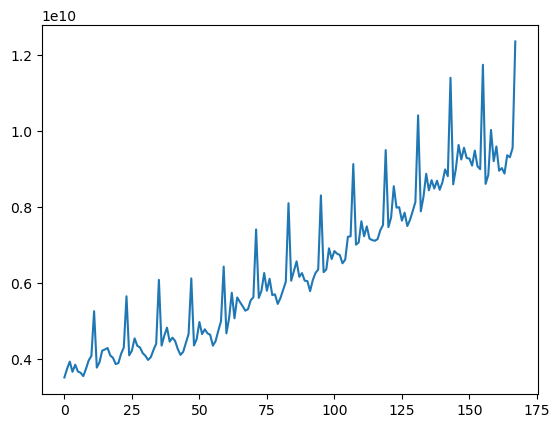

In [27]:
# numpyを使う
# ここでは元系列のまま分析を行う
series = np.loadtxt("../public/full_monthly_sales_without_header.csv")
plt.plot(series)
plt.show()

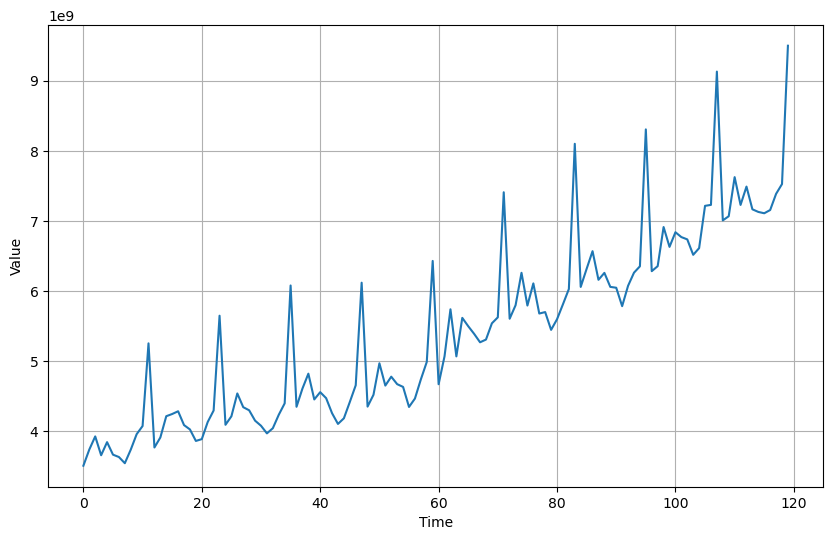

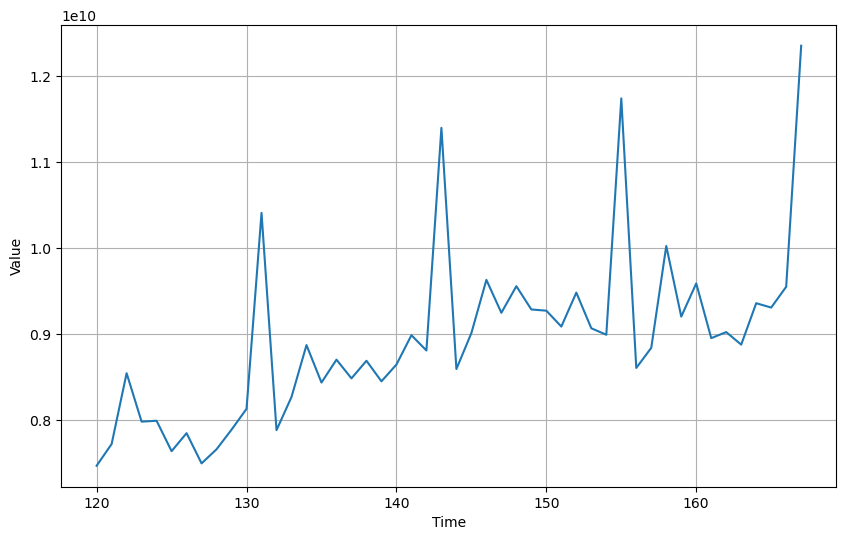

In [28]:
# 前半120時点を学習データ、以降を48時点を検証データとして分割

split_time = 120
time = np.arange(168, dtype="float32")

time_train = time[:split_time]
x_train = series[:split_time]
time_train_pred = time[20:split_time]
time_valid = time[split_time:168]
x_valid = series[split_time:168]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

plt.figure(figsize=(10, 6))
plot_series(time_train, x_train) # 学習セット
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid) # 検証セット
plt.show()

In [71]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [88]:
%%time
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(SimpleRNN(1000, input_shape=[None, 1], return_sequences=True, dropout=0.1, recurrent_dropout=0.5, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500
4/4 [==============================] - 2s 82ms/step - loss: 100.8310
Epoch 2/500
4/4 [==============================] - 0s 56ms/step - loss: 85.6467
Epoch 3/500
4/4 [==============================] - 0s 52ms/step - loss: 63.0205
Epoch 4/500
4/4 [==============================] - 0s 53ms/step - loss: 35.4249
Epoch 5/500
4/4 [==============================] - 0s 52ms/step - loss: 32.3353
Epoch 6/500
4/4 [==============================] - 0s 54ms/step - loss: 28.6971
Epoch 7/500
4/4 [==============================] - 0s 53ms/step - loss: 27.7387
Epoch 8/500
4/4 [==============================] - 0s 53ms/step - loss: 25.6114
Epoch 9/500
4/4 [==============================] - 0s 52ms/step - loss: 24.4608
Epoch 10/500
4/4 [==============================] - 0s 52ms/step - loss: 23.0699
Epoch 11/500
4/4 [==============================] - 0s 55ms/step - loss: 21.9869
Epoch 12/500
4/4 [==============================] - 0s 65ms/step - loss: 21.0390
Epoch 13/500
4/4 [==================

4/4 [==============================] - 0s 53ms/step - loss: 11.9879
Epoch 103/500
4/4 [==============================] - 0s 48ms/step - loss: 11.5475
Epoch 104/500
4/4 [==============================] - 0s 51ms/step - loss: 11.8664
Epoch 105/500
4/4 [==============================] - 0s 50ms/step - loss: 11.8286
Epoch 106/500
4/4 [==============================] - 0s 50ms/step - loss: 11.9457
Epoch 107/500
4/4 [==============================] - 0s 53ms/step - loss: 11.2603
Epoch 108/500
4/4 [==============================] - 0s 55ms/step - loss: 12.0044
Epoch 109/500
4/4 [==============================] - 0s 60ms/step - loss: 11.5088
Epoch 110/500
4/4 [==============================] - 0s 64ms/step - loss: 11.1277
Epoch 111/500
4/4 [==============================] - 0s 58ms/step - loss: 11.9976
Epoch 112/500
4/4 [==============================] - 0s 57ms/step - loss: 11.2200
Epoch 113/500
4/4 [==============================] - 0s 50ms/step - loss: 11.2379
Epoch 114/500
4/4 [===========

4/4 [==============================] - 0s 61ms/step - loss: 9.9860
Epoch 203/500
4/4 [==============================] - 0s 51ms/step - loss: 10.1062
Epoch 204/500
4/4 [==============================] - 0s 49ms/step - loss: 10.0823
Epoch 205/500
4/4 [==============================] - 0s 50ms/step - loss: 9.4241
Epoch 206/500
4/4 [==============================] - 0s 52ms/step - loss: 10.5685
Epoch 207/500
4/4 [==============================] - 0s 49ms/step - loss: 10.4611
Epoch 208/500
4/4 [==============================] - 0s 49ms/step - loss: 9.7048
Epoch 209/500
4/4 [==============================] - 0s 49ms/step - loss: 9.7533
Epoch 210/500
4/4 [==============================] - 0s 50ms/step - loss: 9.4284
Epoch 211/500
4/4 [==============================] - 0s 50ms/step - loss: 10.1460
Epoch 212/500
4/4 [==============================] - 0s 95ms/step - loss: 9.7477
Epoch 213/500
4/4 [==============================] - 0s 50ms/step - loss: 9.6587
Epoch 214/500
4/4 [==================

4/4 [==============================] - 0s 63ms/step - loss: 9.2072
Epoch 304/500
4/4 [==============================] - 0s 60ms/step - loss: 9.3466
Epoch 305/500
4/4 [==============================] - 0s 48ms/step - loss: 9.7397
Epoch 306/500
4/4 [==============================] - 0s 48ms/step - loss: 9.3664
Epoch 307/500
4/4 [==============================] - 0s 49ms/step - loss: 10.2564
Epoch 308/500
4/4 [==============================] - 0s 50ms/step - loss: 10.1607
Epoch 309/500
4/4 [==============================] - 0s 50ms/step - loss: 9.6159
Epoch 310/500
4/4 [==============================] - 0s 48ms/step - loss: 9.9220
Epoch 311/500
4/4 [==============================] - 0s 59ms/step - loss: 9.8039
Epoch 312/500
4/4 [==============================] - 0s 63ms/step - loss: 9.5706
Epoch 313/500
4/4 [==============================] - 0s 65ms/step - loss: 9.3066
Epoch 314/500
4/4 [==============================] - 0s 67ms/step - loss: 10.0219
Epoch 315/500
4/4 [====================

4/4 [==============================] - 0s 66ms/step - loss: 9.5785
Epoch 405/500
4/4 [==============================] - 0s 55ms/step - loss: 9.1680
Epoch 406/500
4/4 [==============================] - 0s 58ms/step - loss: 9.4673
Epoch 407/500
4/4 [==============================] - 0s 59ms/step - loss: 9.7913
Epoch 408/500
4/4 [==============================] - 0s 60ms/step - loss: 9.1473
Epoch 409/500
4/4 [==============================] - 0s 84ms/step - loss: 9.2671
Epoch 410/500
4/4 [==============================] - 0s 72ms/step - loss: 9.6056
Epoch 411/500
4/4 [==============================] - 0s 72ms/step - loss: 9.8937
Epoch 412/500
4/4 [==============================] - 0s 73ms/step - loss: 9.5127
Epoch 413/500
4/4 [==============================] - 0s 67ms/step - loss: 9.6741
Epoch 414/500
4/4 [==============================] - 0s 64ms/step - loss: 9.7220
Epoch 415/500
4/4 [==============================] - 0s 73ms/step - loss: 9.6735
Epoch 416/500
4/4 [=======================

1/1 [==============================] - 0s 26ms/step


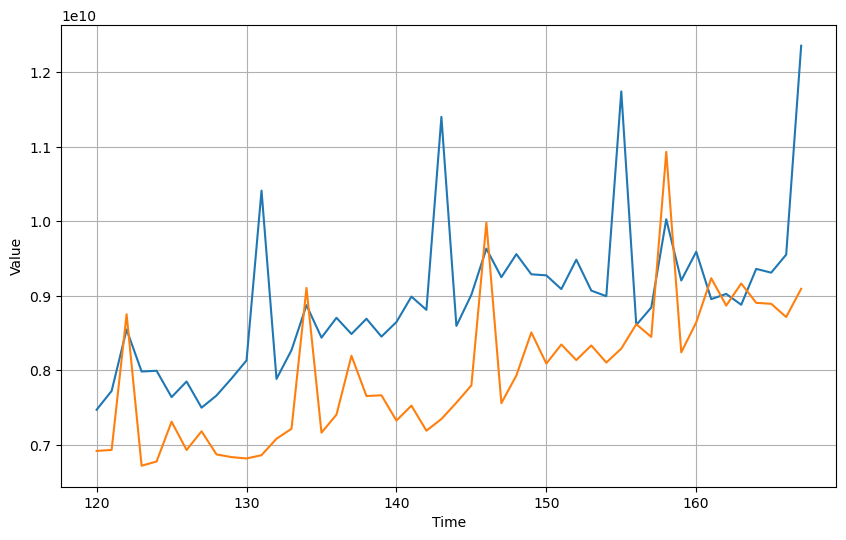

In [89]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [91]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.11524878557140485


In [94]:
%%time
# 学習率の大まかなエリアを絞り込む

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(SimpleRNN(100, input_shape=[None, 1], return_sequences=True, dropout=0.1, recurrent_dropout=0.5, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss="mape", optimizer=optimizer)
history = model.fit(dataset, epochs=500, callbacks=[lr_schedule], verbose=0)

CPU times: user 30.6 s, sys: 4.42 s, total: 35.1 s
Wall time: 18.9 s


(1e-08, 0.001, 0.0, 300.0)

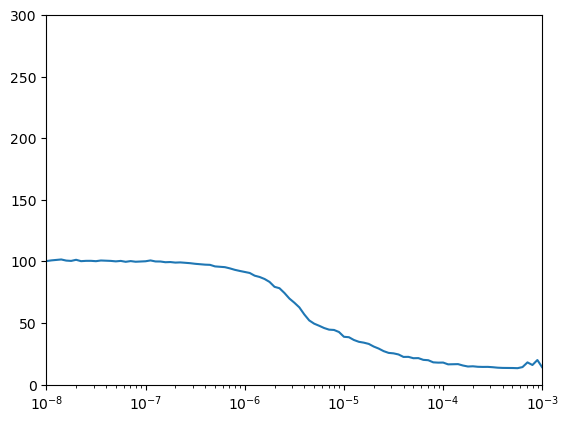

In [95]:
lrs = 1e-8 * (10 ** (np.arange(500) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])

In [96]:
# 学習率は10^-4あたりで最低となる

In [100]:
%%time
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(SimpleRNN(500, input_shape=[None, 1], return_sequences=True, dropout=0.1, recurrent_dropout=0.5, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 67ms/step - loss: 99.1607
Epoch 2/500
4/4 [==============================] - 0s 21ms/step - loss: 50.2466
Epoch 3/500
4/4 [==============================] - 0s 21ms/step - loss: 30.3422
Epoch 4/500
4/4 [==============================] - 0s 22ms/step - loss: 26.4572
Epoch 5/500
4/4 [==============================] - 0s 20ms/step - loss: 25.6061
Epoch 6/500
4/4 [==============================] - 0s 20ms/step - loss: 23.8688
Epoch 7/500
4/4 [==============================] - 0s 23ms/step - loss: 24.0071
Epoch 8/500
4/4 [==============================] - 0s 20ms/step - loss: 22.1868
Epoch 9/500
4/4 [==============================] - 0s 25ms/step - loss: 21.5411
Epoch 10/500
4/4 [==============================] - 0s 22ms/step - loss: 20.7125
Epoch 11/500
4/4 [==============================] - 0s 25ms/step - loss: 20.7140
Epoch 12/500
4/4 [==============================] - 0s 26ms/step - loss: 19.2291
Epoch 13/500
4/4 [===================

4/4 [==============================] - 0s 25ms/step - loss: 12.4455
Epoch 103/500
4/4 [==============================] - 0s 24ms/step - loss: 12.2463
Epoch 104/500
4/4 [==============================] - 0s 22ms/step - loss: 12.1438
Epoch 105/500
4/4 [==============================] - 0s 23ms/step - loss: 12.1652
Epoch 106/500
4/4 [==============================] - 0s 21ms/step - loss: 11.9365
Epoch 107/500
4/4 [==============================] - 0s 21ms/step - loss: 11.8432
Epoch 108/500
4/4 [==============================] - 0s 25ms/step - loss: 11.9741
Epoch 109/500
4/4 [==============================] - 0s 18ms/step - loss: 12.2100
Epoch 110/500
4/4 [==============================] - 0s 18ms/step - loss: 11.6780
Epoch 111/500
4/4 [==============================] - 0s 20ms/step - loss: 12.3769
Epoch 112/500
4/4 [==============================] - 0s 24ms/step - loss: 11.7217
Epoch 113/500
4/4 [==============================] - 0s 24ms/step - loss: 11.7051
Epoch 114/500
4/4 [===========

4/4 [==============================] - 0s 21ms/step - loss: 10.6000
Epoch 203/500
4/4 [==============================] - 0s 24ms/step - loss: 10.7470
Epoch 204/500
4/4 [==============================] - 0s 22ms/step - loss: 11.1630
Epoch 205/500
4/4 [==============================] - 0s 17ms/step - loss: 10.0486
Epoch 206/500
4/4 [==============================] - 0s 17ms/step - loss: 11.0280
Epoch 207/500
4/4 [==============================] - 0s 17ms/step - loss: 10.2300
Epoch 208/500
4/4 [==============================] - 0s 18ms/step - loss: 10.5100
Epoch 209/500
4/4 [==============================] - 0s 19ms/step - loss: 10.6098
Epoch 210/500
4/4 [==============================] - 0s 22ms/step - loss: 10.0405
Epoch 211/500
4/4 [==============================] - 0s 20ms/step - loss: 10.8896
Epoch 212/500
4/4 [==============================] - 0s 17ms/step - loss: 10.4920
Epoch 213/500
4/4 [==============================] - 0s 17ms/step - loss: 10.4335
Epoch 214/500
4/4 [===========

4/4 [==============================] - 0s 20ms/step - loss: 9.6188
Epoch 303/500
4/4 [==============================] - 0s 20ms/step - loss: 9.6903
Epoch 304/500
4/4 [==============================] - 0s 19ms/step - loss: 10.1294
Epoch 305/500
4/4 [==============================] - 0s 20ms/step - loss: 10.1525
Epoch 306/500
4/4 [==============================] - 0s 19ms/step - loss: 10.3107
Epoch 307/500
4/4 [==============================] - 0s 19ms/step - loss: 10.8622
Epoch 308/500
4/4 [==============================] - 0s 19ms/step - loss: 10.3838
Epoch 309/500
4/4 [==============================] - 0s 19ms/step - loss: 10.2626
Epoch 310/500
4/4 [==============================] - 0s 18ms/step - loss: 10.8946
Epoch 311/500
4/4 [==============================] - 0s 17ms/step - loss: 10.4408
Epoch 312/500
4/4 [==============================] - 0s 16ms/step - loss: 9.9192
Epoch 313/500
4/4 [==============================] - 0s 16ms/step - loss: 10.3673
Epoch 314/500
4/4 [==============

4/4 [==============================] - 0s 18ms/step - loss: 10.0169
Epoch 403/500
4/4 [==============================] - 0s 16ms/step - loss: 9.9724
Epoch 404/500
4/4 [==============================] - 0s 17ms/step - loss: 9.8629
Epoch 405/500
4/4 [==============================] - 0s 16ms/step - loss: 9.5136
Epoch 406/500
4/4 [==============================] - 0s 16ms/step - loss: 9.8695
Epoch 407/500
4/4 [==============================] - 0s 16ms/step - loss: 10.0355
Epoch 408/500
4/4 [==============================] - 0s 16ms/step - loss: 9.9562
Epoch 409/500
4/4 [==============================] - 0s 17ms/step - loss: 10.0315
Epoch 410/500
4/4 [==============================] - 0s 16ms/step - loss: 10.0163
Epoch 411/500
4/4 [==============================] - 0s 16ms/step - loss: 10.0990
Epoch 412/500
4/4 [==============================] - 0s 16ms/step - loss: 9.8334
Epoch 413/500
4/4 [==============================] - 0s 16ms/step - loss: 9.9002
Epoch 414/500
4/4 [==================

1/1 [==============================] - 0s 18ms/step


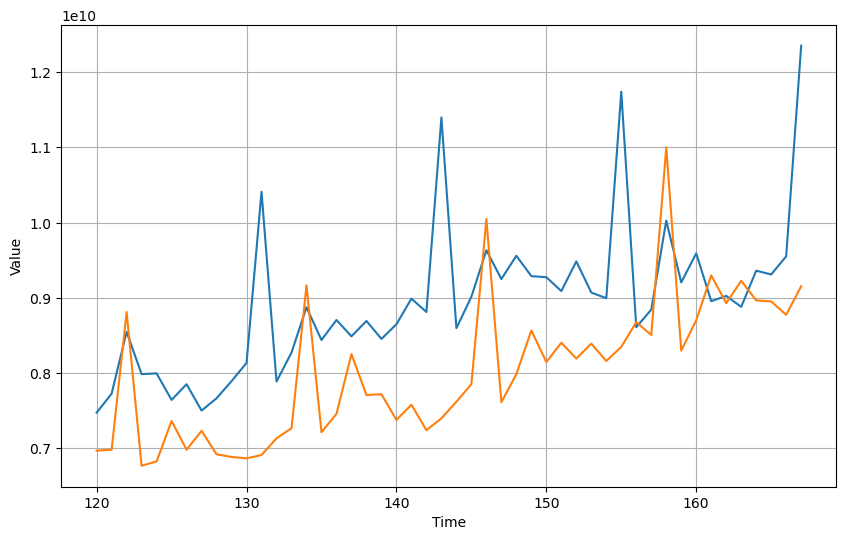

In [99]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [101]:
dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

In [102]:
# ここからはAI-データサイエンスのための図解でわかる数学プログラミングを参考にする

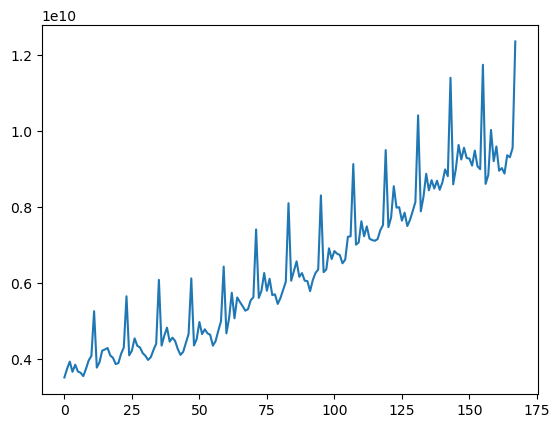

In [103]:
# numpyを使う
# ここでは元系列のまま分析を行う
series = np.loadtxt("../public/full_monthly_sales_without_header.csv")
plt.plot(series)
plt.show()

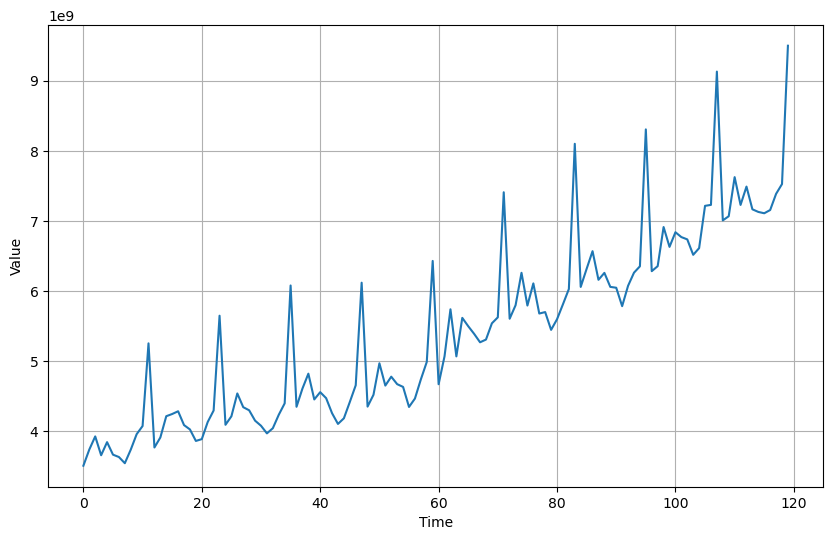

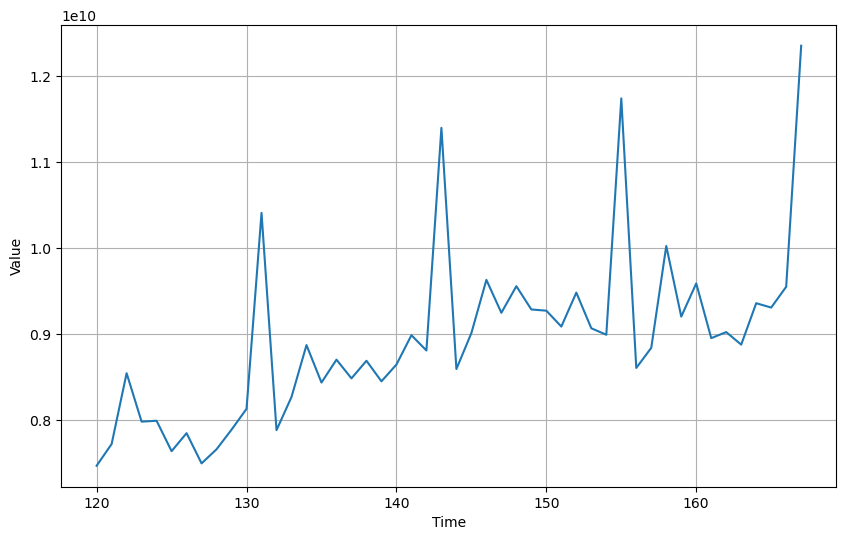

In [105]:
# 前半120時点を学習データ、以降を48時点を検証データとして分割

split_time = 120
time = np.arange(168, dtype="float32")

time_train = time[:split_time]
data_train = series[:split_time]
time_train_pred = time[20:split_time]
time_valid = time[split_time:168]
data_valid = series[split_time:168]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

plt.figure(figsize=(10, 6))
plot_series(time_train, x_train) # 学習セット
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid) # 検証セット
plt.show()

In [106]:
def create_dataset(data, history_steps, future_steps):
    input_data = []
    output_data= []

    for i in range(len(data)-history_steps-future_steps):
        input_data.append([[val] for val in data[i:i+history_steps]])
        output_data.append(data[i+history_steps:i+history_steps+future_steps])

    return np.array(input_data), np.array(output_data)

# 24ステップ分のデータから1ステップ未来までを予測するデータを作成
history_steps = 24
future_steps = 1

x_train, y_train = create_dataset(data_train, history_steps, future_steps)
x_test, y_test =  create_dataset(data_valid, history_steps, future_steps)

In [112]:
%%time

model = Sequential()
model.add(SimpleRNN(500, input_shape=[None, 1], return_sequences=True, dropout=0.1, recurrent_dropout=0.5, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(x_train, y_train, epochs=500,  verbose=1)

Epoch 1/500
3/3 [==============================] - 1s 73ms/step - loss: 93.5859
Epoch 2/500
3/3 [==============================] - 0s 49ms/step - loss: 53.6437
Epoch 3/500
3/3 [==============================] - 0s 48ms/step - loss: 36.1342
Epoch 4/500
3/3 [==============================] - 0s 44ms/step - loss: 30.7774
Epoch 5/500
3/3 [==============================] - 0s 41ms/step - loss: 27.3845
Epoch 6/500
3/3 [==============================] - 0s 42ms/step - loss: 24.6510
Epoch 7/500
3/3 [==============================] - 0s 37ms/step - loss: 24.6943
Epoch 8/500
3/3 [==============================] - 0s 40ms/step - loss: 23.2617
Epoch 9/500
3/3 [==============================] - 0s 39ms/step - loss: 21.6472
Epoch 10/500
3/3 [==============================] - 0s 41ms/step - loss: 20.9277
Epoch 11/500
3/3 [==============================] - 0s 34ms/step - loss: 21.4172
Epoch 12/500
3/3 [==============================] - 0s 34ms/step - loss: 21.3202
Epoch 13/500
3/3 [===================

3/3 [==============================] - 0s 46ms/step - loss: 12.6546
Epoch 103/500
3/3 [==============================] - 0s 55ms/step - loss: 12.2445
Epoch 104/500
3/3 [==============================] - 0s 63ms/step - loss: 12.3687
Epoch 105/500
3/3 [==============================] - 0s 46ms/step - loss: 12.3434
Epoch 106/500
3/3 [==============================] - 0s 47ms/step - loss: 12.6091
Epoch 107/500
3/3 [==============================] - 0s 32ms/step - loss: 12.3963
Epoch 108/500
3/3 [==============================] - 0s 32ms/step - loss: 12.6291
Epoch 109/500
3/3 [==============================] - 0s 32ms/step - loss: 12.0626
Epoch 110/500
3/3 [==============================] - 0s 33ms/step - loss: 12.0990
Epoch 111/500
3/3 [==============================] - 0s 33ms/step - loss: 12.2820
Epoch 112/500
3/3 [==============================] - 0s 32ms/step - loss: 12.2098
Epoch 113/500
3/3 [==============================] - 0s 32ms/step - loss: 12.1016
Epoch 114/500
3/3 [===========

3/3 [==============================] - 0s 54ms/step - loss: 10.7581
Epoch 203/500
3/3 [==============================] - 0s 46ms/step - loss: 10.3771
Epoch 204/500
3/3 [==============================] - 0s 34ms/step - loss: 10.7915
Epoch 205/500
3/3 [==============================] - 0s 48ms/step - loss: 10.3846
Epoch 206/500
3/3 [==============================] - 0s 43ms/step - loss: 10.7284
Epoch 207/500
3/3 [==============================] - 0s 42ms/step - loss: 10.8295
Epoch 208/500
3/3 [==============================] - 0s 39ms/step - loss: 10.5261
Epoch 209/500
3/3 [==============================] - 0s 33ms/step - loss: 10.4205
Epoch 210/500
3/3 [==============================] - 0s 43ms/step - loss: 10.8692
Epoch 211/500
3/3 [==============================] - 0s 35ms/step - loss: 10.6961
Epoch 212/500
3/3 [==============================] - 0s 42ms/step - loss: 10.2294
Epoch 213/500
3/3 [==============================] - 0s 42ms/step - loss: 10.3289
Epoch 214/500
3/3 [===========

3/3 [==============================] - 0s 35ms/step - loss: 10.0559
Epoch 303/500
3/3 [==============================] - 0s 36ms/step - loss: 9.8822
Epoch 304/500
3/3 [==============================] - 0s 38ms/step - loss: 10.0693
Epoch 305/500
3/3 [==============================] - 0s 35ms/step - loss: 10.7069
Epoch 306/500
3/3 [==============================] - 0s 36ms/step - loss: 10.0740
Epoch 307/500
3/3 [==============================] - 0s 36ms/step - loss: 10.1658
Epoch 308/500
3/3 [==============================] - 0s 36ms/step - loss: 10.2790
Epoch 309/500
3/3 [==============================] - 0s 34ms/step - loss: 10.8583
Epoch 310/500
3/3 [==============================] - 0s 34ms/step - loss: 10.3813
Epoch 311/500
3/3 [==============================] - 0s 38ms/step - loss: 10.5860
Epoch 312/500
3/3 [==============================] - 0s 34ms/step - loss: 10.1952
Epoch 313/500
3/3 [==============================] - 0s 35ms/step - loss: 10.1884
Epoch 314/500
3/3 [============

3/3 [==============================] - 0s 34ms/step - loss: 10.3963
Epoch 403/500
3/3 [==============================] - 0s 33ms/step - loss: 10.0175
Epoch 404/500
3/3 [==============================] - 0s 33ms/step - loss: 9.8809
Epoch 405/500
3/3 [==============================] - 0s 32ms/step - loss: 10.2610
Epoch 406/500
3/3 [==============================] - 0s 32ms/step - loss: 10.2837
Epoch 407/500
3/3 [==============================] - 0s 32ms/step - loss: 10.3674
Epoch 408/500
3/3 [==============================] - 0s 32ms/step - loss: 10.1377
Epoch 409/500
3/3 [==============================] - 0s 31ms/step - loss: 10.0685
Epoch 410/500
3/3 [==============================] - 0s 33ms/step - loss: 9.8134
Epoch 411/500
3/3 [==============================] - 0s 32ms/step - loss: 10.5698
Epoch 412/500
3/3 [==============================] - 0s 32ms/step - loss: 10.0265
Epoch 413/500
3/3 [==============================] - 0s 32ms/step - loss: 10.0403
Epoch 414/500
3/3 [=============

1/1 [==============================] - 0s 15ms/step


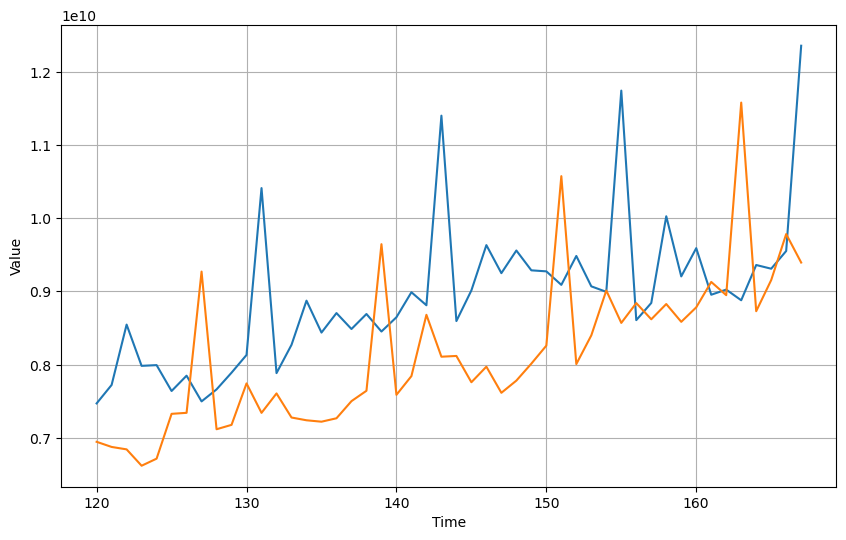

In [114]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [121]:
# 48ステップ分のデータから1ステップ未来までを予測するデータを作成
history_steps = 48
future_steps = 1

x_train, y_train = create_dataset(data_train, history_steps, future_steps)
x_test, y_test =  create_dataset(data_valid, history_steps, future_steps)

In [122]:
%%time

model = Sequential()
model.add(SimpleRNN(500, input_shape=[None, 1], return_sequences=True, dropout=0.1, recurrent_dropout=0.5, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(x_train, y_train, epochs=500,  verbose=1)

Epoch 1/500
3/3 [==============================] - 1s 94ms/step - loss: 97.3359
Epoch 2/500
3/3 [==============================] - 0s 74ms/step - loss: 46.3328
Epoch 3/500
3/3 [==============================] - 0s 52ms/step - loss: 32.0272
Epoch 4/500
3/3 [==============================] - 0s 53ms/step - loss: 27.8324
Epoch 5/500
3/3 [==============================] - 0s 51ms/step - loss: 25.7046
Epoch 6/500
3/3 [==============================] - 0s 52ms/step - loss: 24.4333
Epoch 7/500
3/3 [==============================] - 0s 52ms/step - loss: 22.5495
Epoch 8/500
3/3 [==============================] - 0s 51ms/step - loss: 22.1172
Epoch 9/500
3/3 [==============================] - 0s 51ms/step - loss: 21.4789
Epoch 10/500
3/3 [==============================] - 0s 66ms/step - loss: 20.8065
Epoch 11/500
3/3 [==============================] - 0s 53ms/step - loss: 20.7803
Epoch 12/500
3/3 [==============================] - 0s 72ms/step - loss: 20.8523
Epoch 13/500
3/3 [===================

3/3 [==============================] - 0s 62ms/step - loss: 15.0789
Epoch 103/500
3/3 [==============================] - 0s 60ms/step - loss: 14.9675
Epoch 104/500
3/3 [==============================] - 0s 58ms/step - loss: 14.5915
Epoch 105/500
3/3 [==============================] - 0s 56ms/step - loss: 14.4921
Epoch 106/500
3/3 [==============================] - 0s 59ms/step - loss: 14.6319
Epoch 107/500
3/3 [==============================] - 0s 46ms/step - loss: 14.6007
Epoch 108/500
3/3 [==============================] - 0s 46ms/step - loss: 14.4620
Epoch 109/500
3/3 [==============================] - 0s 47ms/step - loss: 14.3750
Epoch 110/500
3/3 [==============================] - 0s 47ms/step - loss: 14.6855
Epoch 111/500
3/3 [==============================] - 0s 48ms/step - loss: 14.1250
Epoch 112/500
3/3 [==============================] - 0s 46ms/step - loss: 14.5413
Epoch 113/500
3/3 [==============================] - 0s 47ms/step - loss: 14.7488
Epoch 114/500
3/3 [===========

3/3 [==============================] - 0s 46ms/step - loss: 13.1176
Epoch 203/500
3/3 [==============================] - 0s 46ms/step - loss: 13.2062
Epoch 204/500
3/3 [==============================] - 0s 50ms/step - loss: 13.0115
Epoch 205/500
3/3 [==============================] - 0s 47ms/step - loss: 12.7181
Epoch 206/500
3/3 [==============================] - 0s 47ms/step - loss: 12.5689
Epoch 207/500
3/3 [==============================] - 0s 47ms/step - loss: 12.9187
Epoch 208/500
3/3 [==============================] - 0s 47ms/step - loss: 12.6545
Epoch 209/500
3/3 [==============================] - 0s 45ms/step - loss: 12.5140
Epoch 210/500
3/3 [==============================] - 0s 46ms/step - loss: 12.6866
Epoch 211/500
3/3 [==============================] - 0s 48ms/step - loss: 12.6248
Epoch 212/500
3/3 [==============================] - 0s 47ms/step - loss: 12.6078
Epoch 213/500
3/3 [==============================] - 0s 46ms/step - loss: 12.8457
Epoch 214/500
3/3 [===========

3/3 [==============================] - 0s 46ms/step - loss: 12.3830
Epoch 303/500
3/3 [==============================] - 0s 49ms/step - loss: 12.0387
Epoch 304/500
3/3 [==============================] - 0s 47ms/step - loss: 12.0472
Epoch 305/500
3/3 [==============================] - 0s 47ms/step - loss: 11.9346
Epoch 306/500
3/3 [==============================] - 0s 47ms/step - loss: 12.3930
Epoch 307/500
3/3 [==============================] - 0s 47ms/step - loss: 12.0200
Epoch 308/500
3/3 [==============================] - 0s 60ms/step - loss: 12.0122
Epoch 309/500
3/3 [==============================] - 0s 59ms/step - loss: 12.3626
Epoch 310/500
3/3 [==============================] - 0s 56ms/step - loss: 12.1412
Epoch 311/500
3/3 [==============================] - 0s 58ms/step - loss: 11.9043
Epoch 312/500
3/3 [==============================] - 0s 59ms/step - loss: 12.1430
Epoch 313/500
3/3 [==============================] - 0s 58ms/step - loss: 12.1786
Epoch 314/500
3/3 [===========

3/3 [==============================] - 0s 45ms/step - loss: 11.8848
Epoch 403/500
3/3 [==============================] - 0s 47ms/step - loss: 12.0176
Epoch 404/500
3/3 [==============================] - 0s 57ms/step - loss: 11.6889
Epoch 405/500
3/3 [==============================] - 0s 56ms/step - loss: 11.8199
Epoch 406/500
3/3 [==============================] - 0s 56ms/step - loss: 11.8109
Epoch 407/500
3/3 [==============================] - 0s 58ms/step - loss: 11.6634
Epoch 408/500
3/3 [==============================] - 0s 53ms/step - loss: 11.7305
Epoch 409/500
3/3 [==============================] - 0s 59ms/step - loss: 12.0198
Epoch 410/500
3/3 [==============================] - 0s 48ms/step - loss: 11.9651
Epoch 411/500
3/3 [==============================] - 0s 55ms/step - loss: 11.3731
Epoch 412/500
3/3 [==============================] - 0s 46ms/step - loss: 11.6515
Epoch 413/500
3/3 [==============================] - 0s 47ms/step - loss: 11.9364
Epoch 414/500
3/3 [===========

1/1 [==============================] - 0s 16ms/step


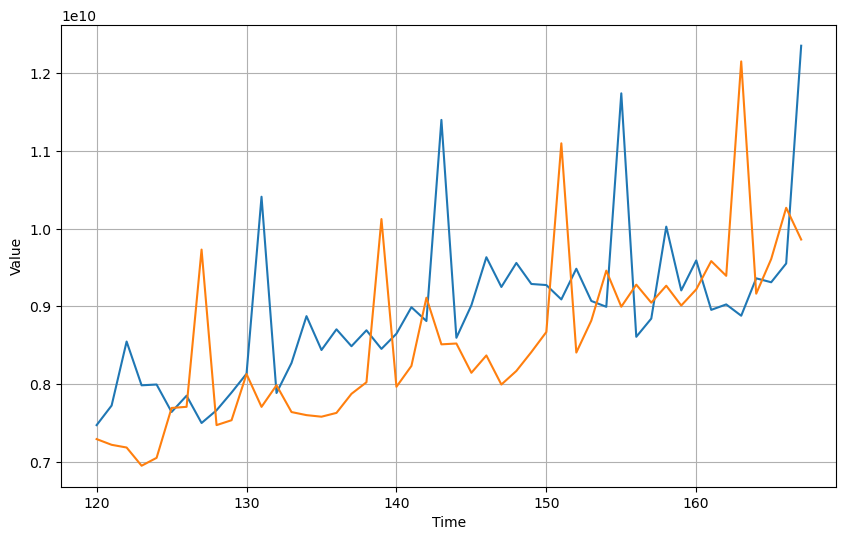

In [123]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [133]:
# 12ステップ分のデータから1ステップ未来までを予測するデータを作成
history_steps = 12
future_steps = 1

x_train, y_train = create_dataset(data_train, history_steps, future_steps)
x_test, y_test =  create_dataset(data_valid, history_steps, future_steps)

In [134]:
%%time

model = Sequential()
model.add(SimpleRNN(100, input_shape=[None, 1], return_sequences=True, dropout=0.1, recurrent_dropout=0.5, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(x_train, y_train, epochs=500,  verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 5ms/step - loss: 79.6312
Epoch 2/500
4/4 [==============================] - 0s 6ms/step - loss: 50.5267
Epoch 3/500
4/4 [==============================] - 0s 7ms/step - loss: 41.0706
Epoch 4/500
4/4 [==============================] - 0s 31ms/step - loss: 36.1942
Epoch 5/500
4/4 [==============================] - 0s 17ms/step - loss: 33.8759
Epoch 6/500
4/4 [==============================] - 0s 9ms/step - loss: 31.5925
Epoch 7/500
4/4 [==============================] - 0s 7ms/step - loss: 28.2548
Epoch 8/500
4/4 [==============================] - 0s 6ms/step - loss: 27.5511
Epoch 9/500
4/4 [==============================] - 0s 7ms/step - loss: 26.7154
Epoch 10/500
4/4 [==============================] - 0s 7ms/step - loss: 25.4243
Epoch 11/500
4/4 [==============================] - 0s 7ms/step - loss: 23.4261
Epoch 12/500
4/4 [==============================] - 0s 7ms/step - loss: 23.1395
Epoch 13/500
4/4 [=============================

4/4 [==============================] - 0s 9ms/step - loss: 14.1912
Epoch 104/500
4/4 [==============================] - 0s 7ms/step - loss: 12.7638
Epoch 105/500
4/4 [==============================] - 0s 7ms/step - loss: 12.9779
Epoch 106/500
4/4 [==============================] - 0s 7ms/step - loss: 12.8107
Epoch 107/500
4/4 [==============================] - 0s 8ms/step - loss: 13.5537
Epoch 108/500
4/4 [==============================] - 0s 7ms/step - loss: 13.2520
Epoch 109/500
4/4 [==============================] - 0s 7ms/step - loss: 13.6032
Epoch 110/500
4/4 [==============================] - 0s 7ms/step - loss: 12.3022
Epoch 111/500
4/4 [==============================] - 0s 7ms/step - loss: 13.2161
Epoch 112/500
4/4 [==============================] - 0s 7ms/step - loss: 13.4235
Epoch 113/500
4/4 [==============================] - 0s 7ms/step - loss: 12.6902
Epoch 114/500
4/4 [==============================] - 0s 8ms/step - loss: 13.8503
Epoch 115/500
4/4 [=======================

4/4 [==============================] - 0s 7ms/step - loss: 12.0433
Epoch 205/500
4/4 [==============================] - 0s 11ms/step - loss: 12.8626
Epoch 206/500
4/4 [==============================] - 0s 15ms/step - loss: 12.0463
Epoch 207/500
4/4 [==============================] - 0s 8ms/step - loss: 11.7796
Epoch 208/500
4/4 [==============================] - 0s 8ms/step - loss: 11.1936
Epoch 209/500
4/4 [==============================] - 0s 8ms/step - loss: 12.6421
Epoch 210/500
4/4 [==============================] - 0s 6ms/step - loss: 11.4610
Epoch 211/500
4/4 [==============================] - 0s 8ms/step - loss: 11.8053
Epoch 212/500
4/4 [==============================] - 0s 7ms/step - loss: 11.8552
Epoch 213/500
4/4 [==============================] - 0s 6ms/step - loss: 12.4127
Epoch 214/500
4/4 [==============================] - 0s 7ms/step - loss: 12.0606
Epoch 215/500
4/4 [==============================] - 0s 9ms/step - loss: 11.4845
Epoch 216/500
4/4 [=====================

4/4 [==============================] - 0s 5ms/step - loss: 11.1760
Epoch 306/500
4/4 [==============================] - 0s 7ms/step - loss: 11.6088
Epoch 307/500
4/4 [==============================] - 0s 6ms/step - loss: 11.2531
Epoch 308/500
4/4 [==============================] - 0s 5ms/step - loss: 10.9574
Epoch 309/500
4/4 [==============================] - 0s 7ms/step - loss: 10.6711
Epoch 310/500
4/4 [==============================] - 0s 6ms/step - loss: 10.9632
Epoch 311/500
4/4 [==============================] - 0s 5ms/step - loss: 10.1230
Epoch 312/500
4/4 [==============================] - 0s 6ms/step - loss: 10.9531
Epoch 313/500
4/4 [==============================] - 0s 6ms/step - loss: 10.8152
Epoch 314/500
4/4 [==============================] - 0s 6ms/step - loss: 11.5568
Epoch 315/500
4/4 [==============================] - 0s 10ms/step - loss: 10.9164
Epoch 316/500
4/4 [==============================] - 0s 8ms/step - loss: 11.0778
Epoch 317/500
4/4 [======================

4/4 [==============================] - 0s 5ms/step - loss: 10.9433
Epoch 407/500
4/4 [==============================] - 0s 5ms/step - loss: 10.8297
Epoch 408/500
4/4 [==============================] - 0s 7ms/step - loss: 11.3146
Epoch 409/500
4/4 [==============================] - 0s 6ms/step - loss: 10.4900
Epoch 410/500
4/4 [==============================] - 0s 6ms/step - loss: 11.0529
Epoch 411/500
4/4 [==============================] - 0s 10ms/step - loss: 10.8356
Epoch 412/500
4/4 [==============================] - 0s 5ms/step - loss: 10.6474
Epoch 413/500
4/4 [==============================] - 0s 5ms/step - loss: 10.8610
Epoch 414/500
4/4 [==============================] - 0s 6ms/step - loss: 11.1221
Epoch 415/500
4/4 [==============================] - 0s 6ms/step - loss: 10.9819
Epoch 416/500
4/4 [==============================] - 0s 6ms/step - loss: 10.5076
Epoch 417/500
4/4 [==============================] - 0s 6ms/step - loss: 11.0347
Epoch 418/500
4/4 [======================

1/1 [==============================] - 0s 15ms/step


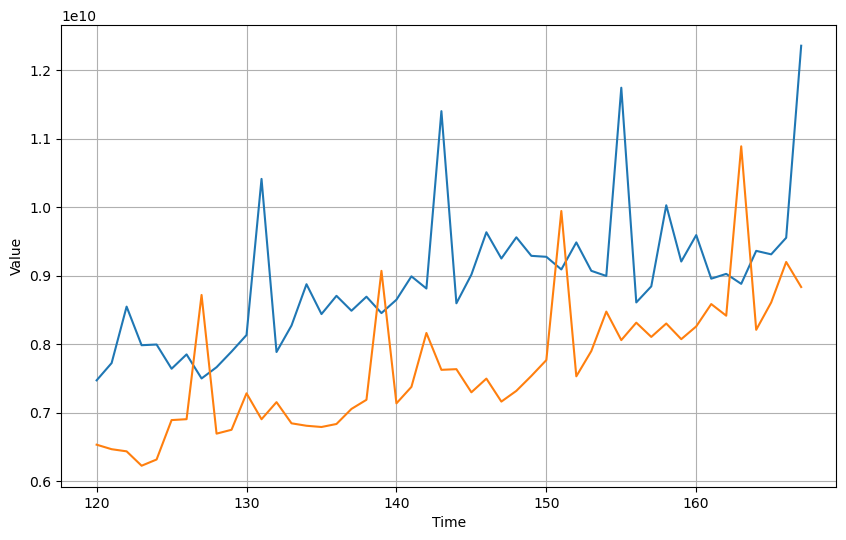

In [135]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [136]:
# やっぱり従来通りでいいや

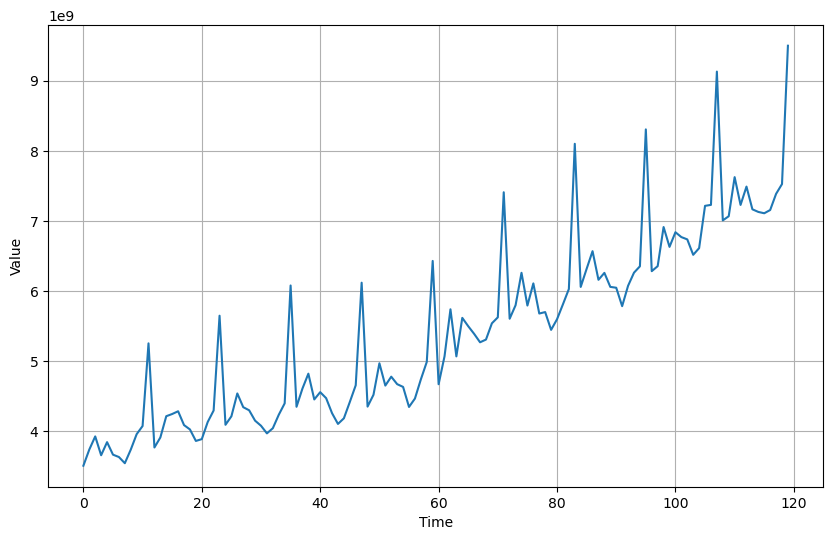

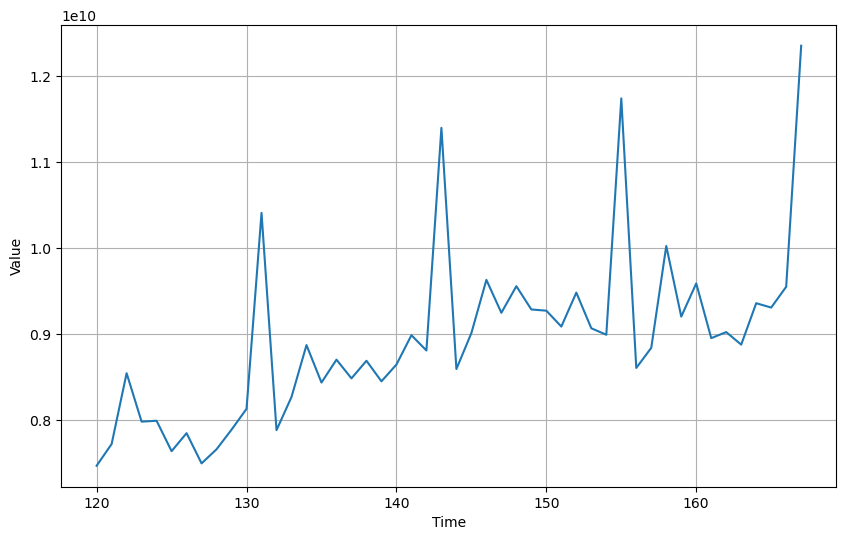

In [138]:
# 前半120時点を学習データ、以降を48時点を検証データとして分割

split_time = 120
time = np.arange(168, dtype="float32")

time_train = time[:split_time]
x_train = series[:split_time]
time_train_pred = time[20:split_time]
time_valid = time[split_time:168]
x_valid = series[split_time:168]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

plt.figure(figsize=(10, 6))
plot_series(time_train, x_train) # 学習セット
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid) # 検証セット
plt.show()

In [139]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [140]:
%%time
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(SimpleRNN(100, input_shape=[None, 1], return_sequences=True, dropout=0.1, recurrent_dropout=0.5, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 25ms/step - loss: 89.0917
Epoch 2/500
4/4 [==============================] - 0s 10ms/step - loss: 84.0735
Epoch 3/500
4/4 [==============================] - 0s 9ms/step - loss: 75.7434
Epoch 4/500
4/4 [==============================] - 0s 8ms/step - loss: 58.4712
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 37.5484
Epoch 6/500
4/4 [==============================] - 0s 9ms/step - loss: 33.5458
Epoch 7/500
4/4 [==============================] - 0s 9ms/step - loss: 32.3047
Epoch 8/500
4/4 [==============================] - 0s 8ms/step - loss: 31.1702
Epoch 9/500
4/4 [==============================] - 0s 8ms/step - loss: 29.2432
Epoch 10/500
4/4 [==============================] - 0s 7ms/step - loss: 27.9534
Epoch 11/500
4/4 [==============================] - 0s 8ms/step - loss: 26.4174
Epoch 12/500
4/4 [==============================] - 0s 8ms/step - loss: 26.0197
Epoch 13/500
4/4 [=============================

4/4 [==============================] - 0s 8ms/step - loss: 14.8534
Epoch 104/500
4/4 [==============================] - 0s 8ms/step - loss: 14.4295
Epoch 105/500
4/4 [==============================] - 0s 8ms/step - loss: 14.3351
Epoch 106/500
4/4 [==============================] - 0s 8ms/step - loss: 15.2464
Epoch 107/500
4/4 [==============================] - 0s 7ms/step - loss: 14.5536
Epoch 108/500
4/4 [==============================] - 0s 8ms/step - loss: 15.4084
Epoch 109/500
4/4 [==============================] - 0s 7ms/step - loss: 14.8210
Epoch 110/500
4/4 [==============================] - 0s 8ms/step - loss: 14.6671
Epoch 111/500
4/4 [==============================] - 0s 7ms/step - loss: 14.7809
Epoch 112/500
4/4 [==============================] - 0s 8ms/step - loss: 14.3713
Epoch 113/500
4/4 [==============================] - 0s 7ms/step - loss: 15.2110
Epoch 114/500
4/4 [==============================] - 0s 8ms/step - loss: 14.5995
Epoch 115/500
4/4 [=======================

4/4 [==============================] - 0s 9ms/step - loss: 13.4695
Epoch 205/500
4/4 [==============================] - 0s 7ms/step - loss: 13.5584
Epoch 206/500
4/4 [==============================] - 0s 8ms/step - loss: 13.3268
Epoch 207/500
4/4 [==============================] - 0s 7ms/step - loss: 13.2057
Epoch 208/500
4/4 [==============================] - 0s 6ms/step - loss: 12.6615
Epoch 209/500
4/4 [==============================] - 0s 7ms/step - loss: 13.3819
Epoch 210/500
4/4 [==============================] - 0s 8ms/step - loss: 13.0008
Epoch 211/500
4/4 [==============================] - 0s 9ms/step - loss: 12.6033
Epoch 212/500
4/4 [==============================] - 0s 8ms/step - loss: 14.0476
Epoch 213/500
4/4 [==============================] - 0s 7ms/step - loss: 12.4208
Epoch 214/500
4/4 [==============================] - 0s 8ms/step - loss: 12.9748
Epoch 215/500
4/4 [==============================] - 0s 7ms/step - loss: 12.9964
Epoch 216/500
4/4 [=======================

4/4 [==============================] - 0s 7ms/step - loss: 11.9914
Epoch 306/500
4/4 [==============================] - 0s 7ms/step - loss: 11.9877
Epoch 307/500
4/4 [==============================] - 0s 6ms/step - loss: 12.2997
Epoch 308/500
4/4 [==============================] - 0s 6ms/step - loss: 12.0941
Epoch 309/500
4/4 [==============================] - 0s 7ms/step - loss: 11.9516
Epoch 310/500
4/4 [==============================] - 0s 7ms/step - loss: 11.6195
Epoch 311/500
4/4 [==============================] - 0s 7ms/step - loss: 11.8615
Epoch 312/500
4/4 [==============================] - 0s 7ms/step - loss: 11.9148
Epoch 313/500
4/4 [==============================] - 0s 6ms/step - loss: 11.8796
Epoch 314/500
4/4 [==============================] - 0s 7ms/step - loss: 12.3213
Epoch 315/500
4/4 [==============================] - 0s 6ms/step - loss: 12.0858
Epoch 316/500
4/4 [==============================] - 0s 7ms/step - loss: 11.8999
Epoch 317/500
4/4 [=======================

4/4 [==============================] - 0s 9ms/step - loss: 11.3942
Epoch 407/500
4/4 [==============================] - 0s 7ms/step - loss: 11.1984
Epoch 408/500
4/4 [==============================] - 0s 7ms/step - loss: 12.0220
Epoch 409/500
4/4 [==============================] - 0s 7ms/step - loss: 11.4787
Epoch 410/500
4/4 [==============================] - 0s 10ms/step - loss: 11.2117
Epoch 411/500
4/4 [==============================] - 0s 9ms/step - loss: 11.7841
Epoch 412/500
4/4 [==============================] - 0s 10ms/step - loss: 11.5681
Epoch 413/500
4/4 [==============================] - 0s 10ms/step - loss: 11.2230
Epoch 414/500
4/4 [==============================] - 0s 9ms/step - loss: 11.5495
Epoch 415/500
4/4 [==============================] - 0s 8ms/step - loss: 11.4627
Epoch 416/500
4/4 [==============================] - 0s 8ms/step - loss: 11.6376
Epoch 417/500
4/4 [==============================] - 0s 11ms/step - loss: 11.6683
Epoch 418/500
4/4 [===================

1/1 [==============================] - 0s 15ms/step


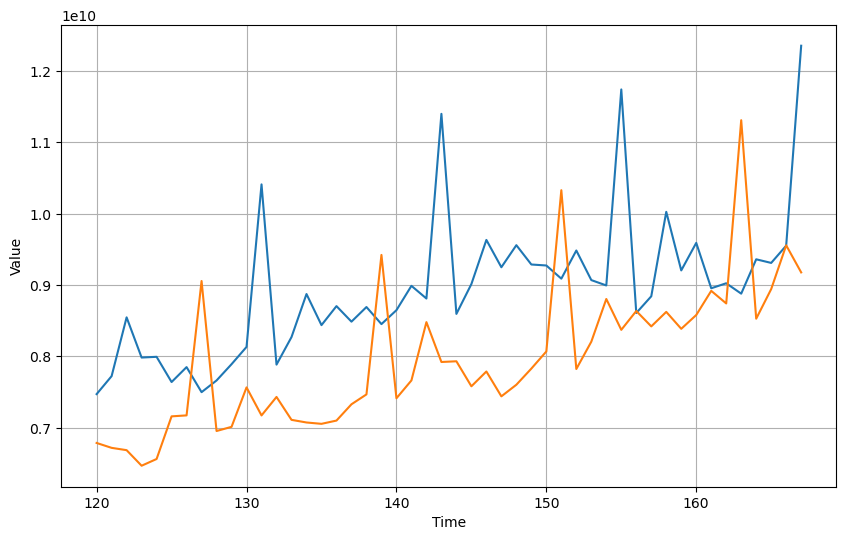

In [141]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [142]:
%%time
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(SimpleRNN(100, input_shape=[None, 1], return_sequences=False, dropout=0.1, recurrent_dropout=0.5, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 14ms/step - loss: 76.1561
Epoch 2/500
4/4 [==============================] - 0s 9ms/step - loss: 57.5191
Epoch 3/500
4/4 [==============================] - 0s 7ms/step - loss: 40.8613
Epoch 4/500
4/4 [==============================] - 0s 8ms/step - loss: 36.2616
Epoch 5/500
4/4 [==============================] - 0s 7ms/step - loss: 31.1018
Epoch 6/500
4/4 [==============================] - 0s 7ms/step - loss: 28.7272
Epoch 7/500
4/4 [==============================] - 0s 7ms/step - loss: 28.9272
Epoch 8/500
4/4 [==============================] - 0s 8ms/step - loss: 25.5643
Epoch 9/500
4/4 [==============================] - 0s 8ms/step - loss: 31.0380
Epoch 10/500
4/4 [==============================] - 0s 6ms/step - loss: 27.8508
Epoch 11/500
4/4 [==============================] - 0s 7ms/step - loss: 24.9030
Epoch 12/500
4/4 [==============================] - 0s 7ms/step - loss: 24.4397
Epoch 13/500
4/4 [==============================

4/4 [==============================] - 0s 8ms/step - loss: 15.7264
Epoch 104/500
4/4 [==============================] - 0s 7ms/step - loss: 12.5459
Epoch 105/500
4/4 [==============================] - 0s 7ms/step - loss: 14.6999
Epoch 106/500
4/4 [==============================] - 0s 13ms/step - loss: 14.9845
Epoch 107/500
4/4 [==============================] - 0s 9ms/step - loss: 13.2112
Epoch 108/500
4/4 [==============================] - 0s 8ms/step - loss: 14.7147
Epoch 109/500
4/4 [==============================] - 0s 8ms/step - loss: 13.2301
Epoch 110/500
4/4 [==============================] - 0s 6ms/step - loss: 15.6302
Epoch 111/500
4/4 [==============================] - 0s 7ms/step - loss: 12.0308
Epoch 112/500
4/4 [==============================] - 0s 8ms/step - loss: 14.0843
Epoch 113/500
4/4 [==============================] - 0s 8ms/step - loss: 13.2334
Epoch 114/500
4/4 [==============================] - 0s 7ms/step - loss: 12.1840
Epoch 115/500
4/4 [======================

4/4 [==============================] - 0s 7ms/step - loss: 10.8718
Epoch 205/500
4/4 [==============================] - 0s 7ms/step - loss: 9.4948
Epoch 206/500
4/4 [==============================] - 0s 6ms/step - loss: 11.6606
Epoch 207/500
4/4 [==============================] - 0s 8ms/step - loss: 10.7122
Epoch 208/500
4/4 [==============================] - 0s 6ms/step - loss: 13.7588
Epoch 209/500
4/4 [==============================] - 0s 6ms/step - loss: 11.6760
Epoch 210/500
4/4 [==============================] - 0s 7ms/step - loss: 10.8857
Epoch 211/500
4/4 [==============================] - 0s 7ms/step - loss: 11.4496
Epoch 212/500
4/4 [==============================] - 0s 8ms/step - loss: 12.4980
Epoch 213/500
4/4 [==============================] - 0s 7ms/step - loss: 11.3072
Epoch 214/500
4/4 [==============================] - 0s 7ms/step - loss: 12.4182
Epoch 215/500
4/4 [==============================] - 0s 6ms/step - loss: 10.5622
Epoch 216/500
4/4 [========================

4/4 [==============================] - 0s 7ms/step - loss: 10.9684
Epoch 306/500
4/4 [==============================] - 0s 8ms/step - loss: 10.2556
Epoch 307/500
4/4 [==============================] - 0s 9ms/step - loss: 10.3060
Epoch 308/500
4/4 [==============================] - 0s 7ms/step - loss: 9.4683
Epoch 309/500
4/4 [==============================] - 0s 8ms/step - loss: 11.3754
Epoch 310/500
4/4 [==============================] - 0s 7ms/step - loss: 10.8698
Epoch 311/500
4/4 [==============================] - 0s 8ms/step - loss: 9.9303
Epoch 312/500
4/4 [==============================] - 0s 8ms/step - loss: 10.5128
Epoch 313/500
4/4 [==============================] - 0s 7ms/step - loss: 9.8205
Epoch 314/500
4/4 [==============================] - 0s 7ms/step - loss: 9.6197
Epoch 315/500
4/4 [==============================] - 0s 7ms/step - loss: 9.2636
Epoch 316/500
4/4 [==============================] - 0s 8ms/step - loss: 11.1215
Epoch 317/500
4/4 [============================

4/4 [==============================] - 0s 9ms/step - loss: 9.5702
Epoch 407/500
4/4 [==============================] - 0s 8ms/step - loss: 10.1980
Epoch 408/500
4/4 [==============================] - 0s 9ms/step - loss: 10.3199
Epoch 409/500
4/4 [==============================] - 0s 9ms/step - loss: 10.0017
Epoch 410/500
4/4 [==============================] - 0s 7ms/step - loss: 10.3349
Epoch 411/500
4/4 [==============================] - 0s 7ms/step - loss: 10.4943
Epoch 412/500
4/4 [==============================] - 0s 7ms/step - loss: 10.1571
Epoch 413/500
4/4 [==============================] - 0s 7ms/step - loss: 8.8249
Epoch 414/500
4/4 [==============================] - 0s 7ms/step - loss: 9.8980
Epoch 415/500
4/4 [==============================] - 0s 7ms/step - loss: 9.7292
Epoch 416/500
4/4 [==============================] - 0s 8ms/step - loss: 9.9824
Epoch 417/500
4/4 [==============================] - 0s 10ms/step - loss: 10.7171
Epoch 418/500
4/4 [===========================

1/1 [==============================] - 0s 16ms/step


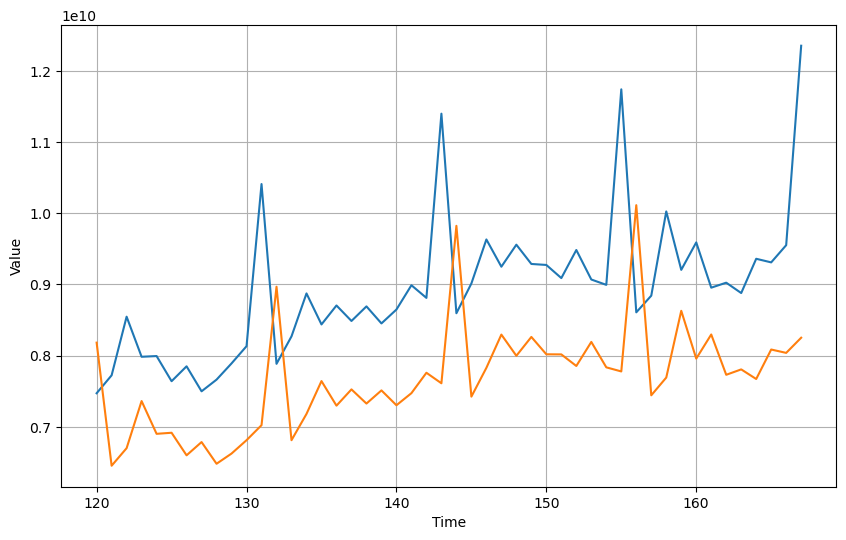

In [143]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [144]:
%%time
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(SimpleRNN(100, input_shape=[None, 1], return_sequences=False, dropout=0.2, recurrent_dropout=0.5, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 20ms/step - loss: 90.2221
Epoch 2/500
4/4 [==============================] - 0s 9ms/step - loss: 48.3574
Epoch 3/500
4/4 [==============================] - 0s 10ms/step - loss: 41.7936
Epoch 4/500
4/4 [==============================] - 0s 12ms/step - loss: 28.1908
Epoch 5/500
4/4 [==============================] - 0s 8ms/step - loss: 29.5271
Epoch 6/500
4/4 [==============================] - 0s 8ms/step - loss: 28.0096
Epoch 7/500
4/4 [==============================] - 0s 9ms/step - loss: 28.2341
Epoch 8/500
4/4 [==============================] - 0s 8ms/step - loss: 22.4044
Epoch 9/500
4/4 [==============================] - 0s 7ms/step - loss: 27.5557
Epoch 10/500
4/4 [==============================] - 0s 8ms/step - loss: 22.3903
Epoch 11/500
4/4 [==============================] - 0s 8ms/step - loss: 22.6879
Epoch 12/500
4/4 [==============================] - 0s 9ms/step - loss: 25.7479
Epoch 13/500
4/4 [============================

4/4 [==============================] - 0s 9ms/step - loss: 14.6680
Epoch 104/500
4/4 [==============================] - 0s 7ms/step - loss: 14.5418
Epoch 105/500
4/4 [==============================] - 0s 7ms/step - loss: 14.2097
Epoch 106/500
4/4 [==============================] - 0s 8ms/step - loss: 15.6910
Epoch 107/500
4/4 [==============================] - 0s 10ms/step - loss: 13.3966
Epoch 108/500
4/4 [==============================] - 0s 6ms/step - loss: 14.4811
Epoch 109/500
4/4 [==============================] - 0s 7ms/step - loss: 11.8579
Epoch 110/500
4/4 [==============================] - 0s 6ms/step - loss: 12.8414
Epoch 111/500
4/4 [==============================] - 0s 6ms/step - loss: 12.4560
Epoch 112/500
4/4 [==============================] - 0s 8ms/step - loss: 15.6981
Epoch 113/500
4/4 [==============================] - 0s 8ms/step - loss: 12.5660
Epoch 114/500
4/4 [==============================] - 0s 7ms/step - loss: 12.7026
Epoch 115/500
4/4 [======================

4/4 [==============================] - 0s 8ms/step - loss: 13.2139
Epoch 205/500
4/4 [==============================] - 0s 7ms/step - loss: 10.4362
Epoch 206/500
4/4 [==============================] - 0s 8ms/step - loss: 13.3888
Epoch 207/500
4/4 [==============================] - 0s 7ms/step - loss: 10.6702
Epoch 208/500
4/4 [==============================] - 0s 7ms/step - loss: 14.9879
Epoch 209/500
4/4 [==============================] - 0s 9ms/step - loss: 11.6158
Epoch 210/500
4/4 [==============================] - 0s 8ms/step - loss: 11.3072
Epoch 211/500
4/4 [==============================] - 0s 7ms/step - loss: 11.9819
Epoch 212/500
4/4 [==============================] - 0s 6ms/step - loss: 11.0028
Epoch 213/500
4/4 [==============================] - 0s 6ms/step - loss: 12.8528
Epoch 214/500
4/4 [==============================] - 0s 6ms/step - loss: 11.3331
Epoch 215/500
4/4 [==============================] - 0s 7ms/step - loss: 13.3356
Epoch 216/500
4/4 [=======================

4/4 [==============================] - 0s 7ms/step - loss: 10.9393
Epoch 306/500
4/4 [==============================] - 0s 7ms/step - loss: 11.4983
Epoch 307/500
4/4 [==============================] - 0s 7ms/step - loss: 10.7793
Epoch 308/500
4/4 [==============================] - 0s 8ms/step - loss: 10.1305
Epoch 309/500
4/4 [==============================] - 0s 7ms/step - loss: 11.9436
Epoch 310/500
4/4 [==============================] - 0s 7ms/step - loss: 12.4642
Epoch 311/500
4/4 [==============================] - 0s 7ms/step - loss: 11.8348
Epoch 312/500
4/4 [==============================] - 0s 6ms/step - loss: 10.6890
Epoch 313/500
4/4 [==============================] - 0s 6ms/step - loss: 11.7795
Epoch 314/500
4/4 [==============================] - 0s 6ms/step - loss: 12.0556
Epoch 315/500
4/4 [==============================] - 0s 6ms/step - loss: 11.1070
Epoch 316/500
4/4 [==============================] - 0s 6ms/step - loss: 10.1153
Epoch 317/500
4/4 [=======================

4/4 [==============================] - 0s 8ms/step - loss: 11.5604
Epoch 407/500
4/4 [==============================] - 0s 8ms/step - loss: 11.5773
Epoch 408/500
4/4 [==============================] - 0s 9ms/step - loss: 12.1631
Epoch 409/500
4/4 [==============================] - 0s 8ms/step - loss: 11.1758
Epoch 410/500
4/4 [==============================] - 0s 8ms/step - loss: 12.0501
Epoch 411/500
4/4 [==============================] - 0s 8ms/step - loss: 9.8617
Epoch 412/500
4/4 [==============================] - 0s 6ms/step - loss: 11.9605
Epoch 413/500
4/4 [==============================] - 0s 6ms/step - loss: 9.7952
Epoch 414/500
4/4 [==============================] - 0s 6ms/step - loss: 12.0587
Epoch 415/500
4/4 [==============================] - 0s 7ms/step - loss: 9.4726
Epoch 416/500
4/4 [==============================] - 0s 7ms/step - loss: 10.6978
Epoch 417/500
4/4 [==============================] - 0s 6ms/step - loss: 11.3898
Epoch 418/500
4/4 [==========================

1/1 [==============================] - 0s 15ms/step


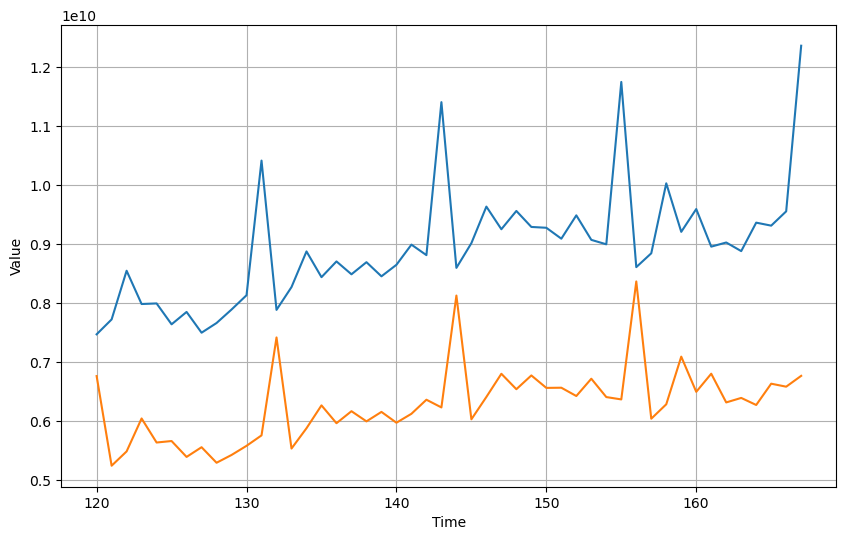

In [145]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [146]:
%%time
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(SimpleRNN(100, input_shape=[None, 1], return_sequences=False, dropout=0.5, recurrent_dropout=0.5, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 16ms/step - loss: 72.6132
Epoch 2/500
4/4 [==============================] - 0s 13ms/step - loss: 47.5375
Epoch 3/500
4/4 [==============================] - 0s 9ms/step - loss: 40.9169
Epoch 4/500
4/4 [==============================] - 0s 8ms/step - loss: 39.2962
Epoch 5/500
4/4 [==============================] - 0s 7ms/step - loss: 34.4394
Epoch 6/500
4/4 [==============================] - 0s 10ms/step - loss: 33.2854
Epoch 7/500
4/4 [==============================] - 0s 12ms/step - loss: 29.6725
Epoch 8/500
4/4 [==============================] - 0s 10ms/step - loss: 34.1059
Epoch 9/500
4/4 [==============================] - 0s 12ms/step - loss: 34.1964
Epoch 10/500
4/4 [==============================] - 0s 10ms/step - loss: 32.4613
Epoch 11/500
4/4 [==============================] - 0s 11ms/step - loss: 25.1385
Epoch 12/500
4/4 [==============================] - 0s 11ms/step - loss: 26.9610
Epoch 13/500
4/4 [======================

4/4 [==============================] - 0s 7ms/step - loss: 18.9563
Epoch 104/500
4/4 [==============================] - 0s 6ms/step - loss: 16.2633
Epoch 105/500
4/4 [==============================] - 0s 7ms/step - loss: 18.5078
Epoch 106/500
4/4 [==============================] - 0s 6ms/step - loss: 20.4734
Epoch 107/500
4/4 [==============================] - 0s 6ms/step - loss: 18.0316
Epoch 108/500
4/4 [==============================] - 0s 6ms/step - loss: 15.6255
Epoch 109/500
4/4 [==============================] - 0s 6ms/step - loss: 19.0145
Epoch 110/500
4/4 [==============================] - 0s 6ms/step - loss: 18.4423
Epoch 111/500
4/4 [==============================] - 0s 6ms/step - loss: 15.8014
Epoch 112/500
4/4 [==============================] - 0s 7ms/step - loss: 19.4432
Epoch 113/500
4/4 [==============================] - 0s 7ms/step - loss: 16.3918
Epoch 114/500
4/4 [==============================] - 0s 6ms/step - loss: 17.2562
Epoch 115/500
4/4 [=======================

4/4 [==============================] - 0s 12ms/step - loss: 17.3462
Epoch 205/500
4/4 [==============================] - 0s 7ms/step - loss: 15.9573
Epoch 206/500
4/4 [==============================] - 0s 8ms/step - loss: 16.5371
Epoch 207/500
4/4 [==============================] - 0s 13ms/step - loss: 15.4480
Epoch 208/500
4/4 [==============================] - 0s 7ms/step - loss: 15.5146
Epoch 209/500
4/4 [==============================] - 0s 6ms/step - loss: 15.4765
Epoch 210/500
4/4 [==============================] - 0s 7ms/step - loss: 16.6524
Epoch 211/500
4/4 [==============================] - 0s 7ms/step - loss: 14.4221
Epoch 212/500
4/4 [==============================] - 0s 7ms/step - loss: 17.7573
Epoch 213/500
4/4 [==============================] - 0s 7ms/step - loss: 17.1312
Epoch 214/500
4/4 [==============================] - 0s 6ms/step - loss: 13.8532
Epoch 215/500
4/4 [==============================] - 0s 7ms/step - loss: 16.5098
Epoch 216/500
4/4 [=====================

4/4 [==============================] - 0s 8ms/step - loss: 14.7236
Epoch 306/500
4/4 [==============================] - 0s 7ms/step - loss: 14.7482
Epoch 307/500
4/4 [==============================] - 0s 6ms/step - loss: 16.5026
Epoch 308/500
4/4 [==============================] - 0s 6ms/step - loss: 13.0808
Epoch 309/500
4/4 [==============================] - 0s 8ms/step - loss: 14.2375
Epoch 310/500
4/4 [==============================] - 0s 8ms/step - loss: 14.8371
Epoch 311/500
4/4 [==============================] - 0s 8ms/step - loss: 13.6217
Epoch 312/500
4/4 [==============================] - 0s 7ms/step - loss: 12.5932
Epoch 313/500
4/4 [==============================] - 0s 7ms/step - loss: 15.7476
Epoch 314/500
4/4 [==============================] - 0s 7ms/step - loss: 15.6434
Epoch 315/500
4/4 [==============================] - 0s 7ms/step - loss: 15.6593
Epoch 316/500
4/4 [==============================] - 0s 7ms/step - loss: 16.1533
Epoch 317/500
4/4 [=======================

4/4 [==============================] - 0s 8ms/step - loss: 14.8002
Epoch 407/500
4/4 [==============================] - 0s 8ms/step - loss: 14.8068
Epoch 408/500
4/4 [==============================] - 0s 8ms/step - loss: 13.8019
Epoch 409/500
4/4 [==============================] - 0s 8ms/step - loss: 18.2829
Epoch 410/500
4/4 [==============================] - 0s 9ms/step - loss: 16.2175
Epoch 411/500
4/4 [==============================] - 0s 9ms/step - loss: 12.8671
Epoch 412/500
4/4 [==============================] - 0s 8ms/step - loss: 13.5019
Epoch 413/500
4/4 [==============================] - 0s 9ms/step - loss: 12.4071
Epoch 414/500
4/4 [==============================] - 0s 9ms/step - loss: 13.1378
Epoch 415/500
4/4 [==============================] - 0s 8ms/step - loss: 11.8825
Epoch 416/500
4/4 [==============================] - 0s 9ms/step - loss: 14.0447
Epoch 417/500
4/4 [==============================] - 0s 10ms/step - loss: 17.2944
Epoch 418/500
4/4 [======================

1/1 [==============================] - 0s 16ms/step


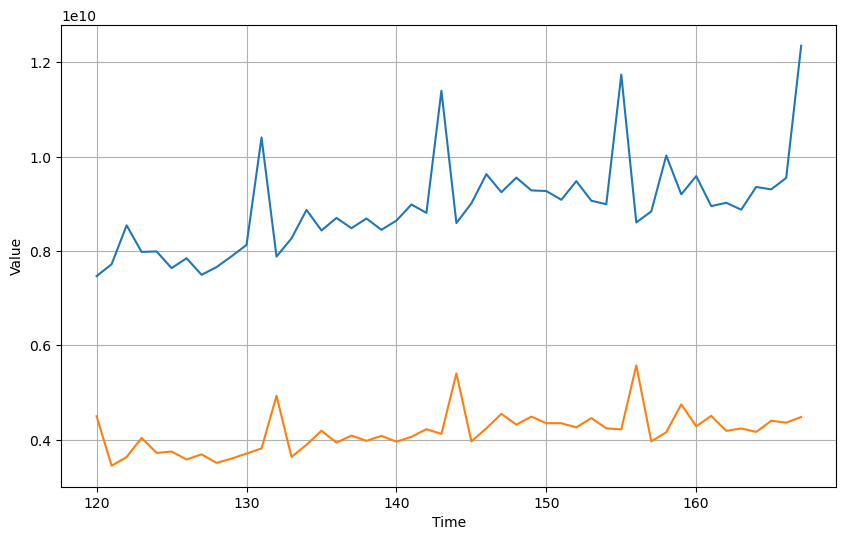

In [147]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [148]:
%%time
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(SimpleRNN(100, input_shape=[None, 1], return_sequences=False, dropout=0.1, recurrent_dropout=0.1, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 47ms/step - loss: 65.0812
Epoch 2/500
4/4 [==============================] - 0s 11ms/step - loss: 22.1077
Epoch 3/500
4/4 [==============================] - 0s 10ms/step - loss: 15.8433
Epoch 4/500
4/4 [==============================] - 0s 8ms/step - loss: 14.7550
Epoch 5/500
4/4 [==============================] - 0s 7ms/step - loss: 15.7618
Epoch 6/500
4/4 [==============================] - 0s 8ms/step - loss: 14.5941
Epoch 7/500
4/4 [==============================] - 0s 8ms/step - loss: 14.1149
Epoch 8/500
4/4 [==============================] - 0s 7ms/step - loss: 13.4199
Epoch 9/500
4/4 [==============================] - 0s 7ms/step - loss: 15.7663
Epoch 10/500
4/4 [==============================] - 0s 7ms/step - loss: 13.2130
Epoch 11/500
4/4 [==============================] - 0s 8ms/step - loss: 15.8359
Epoch 12/500
4/4 [==============================] - 0s 7ms/step - loss: 11.8932
Epoch 13/500
4/4 [============================

4/4 [==============================] - 0s 18ms/step - loss: 9.0652
Epoch 104/500
4/4 [==============================] - 0s 18ms/step - loss: 8.8270
Epoch 105/500
4/4 [==============================] - 0s 13ms/step - loss: 9.6331
Epoch 106/500
4/4 [==============================] - 0s 13ms/step - loss: 12.0301
Epoch 107/500
4/4 [==============================] - 0s 14ms/step - loss: 10.0329
Epoch 108/500
4/4 [==============================] - 0s 15ms/step - loss: 9.7255
Epoch 109/500
4/4 [==============================] - 0s 12ms/step - loss: 8.8112
Epoch 110/500
4/4 [==============================] - 0s 11ms/step - loss: 11.9859
Epoch 111/500
4/4 [==============================] - 0s 10ms/step - loss: 13.6302
Epoch 112/500
4/4 [==============================] - 0s 7ms/step - loss: 9.4840
Epoch 113/500
4/4 [==============================] - 0s 7ms/step - loss: 9.7004
Epoch 114/500
4/4 [==============================] - 0s 7ms/step - loss: 9.7634
Epoch 115/500
4/4 [======================

4/4 [==============================] - 0s 6ms/step - loss: 8.5010
Epoch 206/500
4/4 [==============================] - 0s 6ms/step - loss: 7.5939
Epoch 207/500
4/4 [==============================] - 0s 6ms/step - loss: 8.1575
Epoch 208/500
4/4 [==============================] - 0s 6ms/step - loss: 10.4651
Epoch 209/500
4/4 [==============================] - 0s 7ms/step - loss: 13.3301
Epoch 210/500
4/4 [==============================] - 0s 7ms/step - loss: 8.5127
Epoch 211/500
4/4 [==============================] - 0s 6ms/step - loss: 8.7633
Epoch 212/500
4/4 [==============================] - 0s 6ms/step - loss: 8.4057
Epoch 213/500
4/4 [==============================] - 0s 6ms/step - loss: 9.6721
Epoch 214/500
4/4 [==============================] - 0s 6ms/step - loss: 8.5892
Epoch 215/500
4/4 [==============================] - 0s 6ms/step - loss: 9.9564
Epoch 216/500
4/4 [==============================] - 0s 9ms/step - loss: 8.7971
Epoch 217/500
4/4 [==============================] -

4/4 [==============================] - 0s 9ms/step - loss: 11.8283
Epoch 308/500
4/4 [==============================] - 0s 7ms/step - loss: 8.4462
Epoch 309/500
4/4 [==============================] - 0s 7ms/step - loss: 8.6017
Epoch 310/500
4/4 [==============================] - 0s 6ms/step - loss: 8.3628
Epoch 311/500
4/4 [==============================] - 0s 7ms/step - loss: 9.6183
Epoch 312/500
4/4 [==============================] - 0s 7ms/step - loss: 9.4300
Epoch 313/500
4/4 [==============================] - 0s 7ms/step - loss: 9.0022
Epoch 314/500
4/4 [==============================] - 0s 8ms/step - loss: 8.9198
Epoch 315/500
4/4 [==============================] - 0s 8ms/step - loss: 8.1316
Epoch 316/500
4/4 [==============================] - 0s 8ms/step - loss: 9.3232
Epoch 317/500
4/4 [==============================] - 0s 8ms/step - loss: 8.2560
Epoch 318/500
4/4 [==============================] - 0s 8ms/step - loss: 7.7181
Epoch 319/500
4/4 [==============================] - 

4/4 [==============================] - 0s 6ms/step - loss: 9.8297
Epoch 410/500
4/4 [==============================] - 0s 6ms/step - loss: 10.9974
Epoch 411/500
4/4 [==============================] - 0s 7ms/step - loss: 7.9454
Epoch 412/500
4/4 [==============================] - 0s 7ms/step - loss: 7.5816
Epoch 413/500
4/4 [==============================] - 0s 7ms/step - loss: 8.0241
Epoch 414/500
4/4 [==============================] - 0s 7ms/step - loss: 10.6339
Epoch 415/500
4/4 [==============================] - 0s 6ms/step - loss: 7.4024
Epoch 416/500
4/4 [==============================] - 0s 8ms/step - loss: 7.5210
Epoch 417/500
4/4 [==============================] - 0s 7ms/step - loss: 7.8712
Epoch 418/500
4/4 [==============================] - 0s 6ms/step - loss: 7.8797
Epoch 419/500
4/4 [==============================] - 0s 7ms/step - loss: 10.7467
Epoch 420/500
4/4 [==============================] - 0s 13ms/step - loss: 9.2280
Epoch 421/500
4/4 [==============================]

1/1 [==============================] - 0s 14ms/step


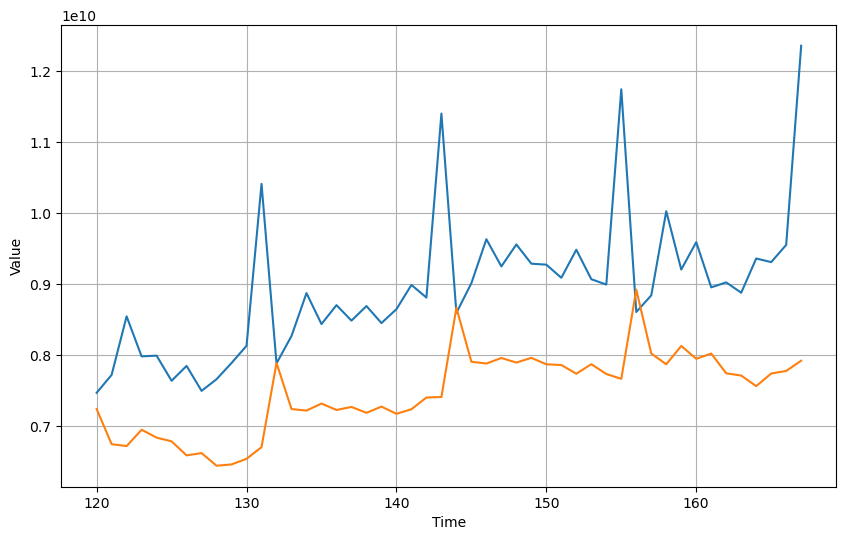

In [149]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [150]:
# 全く近づけられないので、さっさとkeras tunerでチューニングする

In [154]:
%%time

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

def build_model(hp):
  model = Sequential()
  model.add(SimpleRNN(units=hp.Int('rnn_units', min_value=20, max_value=200, step=20),
                      return_sequences=hp.Choice('return_sequences', [True, False]),
                      dropout=hp.Choice('dropout', [0.1, 0.2, 0.3, 0.4, 0.5]),
                      recurrent_dropout=hp.Choice('recurrent_dropout', [0.1, 0.2, 0.3, 0.4, 0.5]),
                      input_shape=[None, 1], activation='relu'))
  model.add(Dense(units=hp.Int('units1', min_value=2, max_value=30, step=4) , activation='relu'))
  model.add(Dense(1))

  model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(hp.Choice('momentum', values=[0.5, 0.7, 0.9]), lr=1e-4))
  return model

tuner = RandomSearch(build_model, objective='loss', max_trials=100, executions_per_trial=3, directory='my_dir', project_name='RNN_1')

tuner.search_space_summary()

tuner.search(dataset, epochs=500, verbose=2)

Trial 100 Complete [00h 01m 22s]
loss: 7.1186574300130205

Best loss So Far: 6.992067337036133
Total elapsed time: 03h 39m 59s
INFO:tensorflow:Oracle triggered exit
CPU times: user 4h 37min 53s, sys: 41min 45s, total: 5h 19min 38s
Wall time: 3h 39min 59s


In [155]:
tuner.results_summary()

Results summary
Results in my_dir/RNN_1
Showing 10 best trials
Trial summary
Hyperparameters:
rnn_units: 180
return_sequences: 0
dropout: 0.1
recurrent_dropout: 0.1
units1: 26
momentum: 0.5
Score: 6.992067337036133
Trial summary
Hyperparameters:
rnn_units: 200
return_sequences: 0
dropout: 0.1
recurrent_dropout: 0.1
units1: 10
momentum: 0.9
Score: 6.996982892354329
Trial summary
Hyperparameters:
rnn_units: 140
return_sequences: 0
dropout: 0.1
recurrent_dropout: 0.1
units1: 18
momentum: 0.9
Score: 7.1186574300130205
Trial summary
Hyperparameters:
rnn_units: 140
return_sequences: 0
dropout: 0.1
recurrent_dropout: 0.1
units1: 6
momentum: 0.9
Score: 7.20922327041626
Trial summary
Hyperparameters:
rnn_units: 160
return_sequences: 0
dropout: 0.3
recurrent_dropout: 0.1
units1: 14
momentum: 0.9
Score: 7.369944254557292
Trial summary
Hyperparameters:
rnn_units: 200
return_sequences: 0
dropout: 0.1
recurrent_dropout: 0.3
units1: 18
momentum: 0.5
Score: 7.8514455159505205
Trial summary
Hyperparame

In [162]:
%%time
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(SimpleRNN(180, input_shape=[None, 1], return_sequences=False, dropout=0.1, recurrent_dropout=0.1, activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 2s 25ms/step - loss: 86.9763
Epoch 2/500
4/4 [==============================] - 0s 15ms/step - loss: 34.1743
Epoch 3/500
4/4 [==============================] - 0s 13ms/step - loss: 20.3697
Epoch 4/500
4/4 [==============================] - 0s 12ms/step - loss: 14.1589
Epoch 5/500
4/4 [==============================] - 0s 12ms/step - loss: 13.0950
Epoch 6/500
4/4 [==============================] - 0s 13ms/step - loss: 15.5190
Epoch 7/500
4/4 [==============================] - 0s 12ms/step - loss: 14.4098
Epoch 8/500
4/4 [==============================] - 0s 13ms/step - loss: 14.0298
Epoch 9/500
4/4 [==============================] - 0s 11ms/step - loss: 17.1990
Epoch 10/500
4/4 [==============================] - 0s 11ms/step - loss: 14.4743
Epoch 11/500
4/4 [==============================] - 0s 16ms/step - loss: 16.7214
Epoch 12/500
4/4 [==============================] - 0s 15ms/step - loss: 16.7632
Epoch 13/500
4/4 [==============================]

4/4 [==============================] - 0s 11ms/step - loss: 8.1219
Epoch 104/500
4/4 [==============================] - 0s 13ms/step - loss: 8.4700
Epoch 105/500
4/4 [==============================] - 0s 9ms/step - loss: 8.3261
Epoch 106/500
4/4 [==============================] - 0s 9ms/step - loss: 9.2226
Epoch 107/500
4/4 [==============================] - 0s 9ms/step - loss: 11.3444
Epoch 108/500
4/4 [==============================] - 0s 10ms/step - loss: 8.6404
Epoch 109/500
4/4 [==============================] - 0s 11ms/step - loss: 9.0374
Epoch 110/500
4/4 [==============================] - 0s 10ms/step - loss: 8.2239
Epoch 111/500
4/4 [==============================] - 0s 10ms/step - loss: 9.1893
Epoch 112/500
4/4 [==============================] - 0s 10ms/step - loss: 7.4971
Epoch 113/500
4/4 [==============================] - 0s 10ms/step - loss: 10.6441
Epoch 114/500
4/4 [==============================] - 0s 11ms/step - loss: 8.4841
Epoch 115/500
4/4 [========================

4/4 [==============================] - 0s 13ms/step - loss: 8.3658
Epoch 205/500
4/4 [==============================] - 0s 12ms/step - loss: 7.7742
Epoch 206/500
4/4 [==============================] - 0s 11ms/step - loss: 8.1175
Epoch 207/500
4/4 [==============================] - 0s 9ms/step - loss: 7.5680
Epoch 208/500
4/4 [==============================] - 0s 12ms/step - loss: 8.3201
Epoch 209/500
4/4 [==============================] - 0s 10ms/step - loss: 8.0427
Epoch 210/500
4/4 [==============================] - 0s 10ms/step - loss: 8.5467
Epoch 211/500
4/4 [==============================] - 0s 10ms/step - loss: 7.8978
Epoch 212/500
4/4 [==============================] - 0s 10ms/step - loss: 8.0676
Epoch 213/500
4/4 [==============================] - 0s 13ms/step - loss: 7.7754
Epoch 214/500
4/4 [==============================] - 0s 11ms/step - loss: 7.7579
Epoch 215/500
4/4 [==============================] - 0s 13ms/step - loss: 8.8916
Epoch 216/500
4/4 [========================

4/4 [==============================] - 0s 13ms/step - loss: 7.9836
Epoch 306/500
4/4 [==============================] - 0s 11ms/step - loss: 8.6395
Epoch 307/500
4/4 [==============================] - 0s 10ms/step - loss: 7.5584
Epoch 308/500
4/4 [==============================] - 0s 11ms/step - loss: 7.6738
Epoch 309/500
4/4 [==============================] - 0s 11ms/step - loss: 8.0683
Epoch 310/500
4/4 [==============================] - 0s 11ms/step - loss: 8.2216
Epoch 311/500
4/4 [==============================] - 0s 11ms/step - loss: 9.3230
Epoch 312/500
4/4 [==============================] - 0s 11ms/step - loss: 7.9775
Epoch 313/500
4/4 [==============================] - 0s 10ms/step - loss: 8.1405
Epoch 314/500
4/4 [==============================] - 0s 10ms/step - loss: 7.9984
Epoch 315/500
4/4 [==============================] - 0s 10ms/step - loss: 8.9046
Epoch 316/500
4/4 [==============================] - 0s 9ms/step - loss: 8.5749
Epoch 317/500
4/4 [========================

4/4 [==============================] - 0s 9ms/step - loss: 9.0043
Epoch 408/500
4/4 [==============================] - 0s 9ms/step - loss: 8.6363
Epoch 409/500
4/4 [==============================] - 0s 9ms/step - loss: 8.4772
Epoch 410/500
4/4 [==============================] - 0s 9ms/step - loss: 7.1737
Epoch 411/500
4/4 [==============================] - 0s 9ms/step - loss: 7.7644
Epoch 412/500
4/4 [==============================] - 0s 8ms/step - loss: 7.9627
Epoch 413/500
4/4 [==============================] - 0s 9ms/step - loss: 8.0335
Epoch 414/500
4/4 [==============================] - 0s 10ms/step - loss: 10.4159
Epoch 415/500
4/4 [==============================] - 0s 11ms/step - loss: 7.5559
Epoch 416/500
4/4 [==============================] - 0s 9ms/step - loss: 7.5397
Epoch 417/500
4/4 [==============================] - 0s 9ms/step - loss: 7.5281
Epoch 418/500
4/4 [==============================] - 0s 8ms/step - loss: 7.3537
Epoch 419/500
4/4 [==============================] 

1/1 [==============================] - 0s 21ms/step


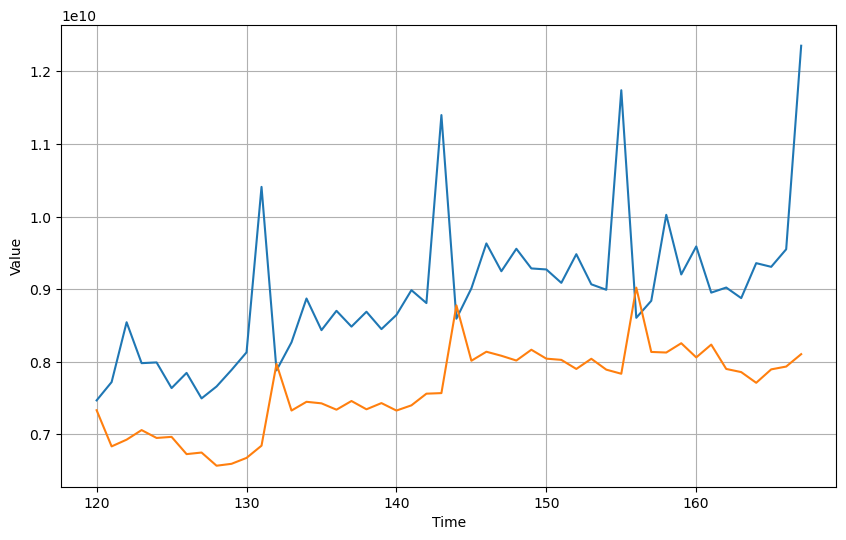

In [163]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [164]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.14388557696688498


In [166]:
%%time
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(SimpleRNN(100, input_shape=[None, 1], return_sequences=False, dropout=0.1, recurrent_dropout=0.1, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 2s 75ms/step - loss: 79.7844
Epoch 2/500
4/4 [==============================] - 0s 7ms/step - loss: 52.1445
Epoch 3/500
4/4 [==============================] - 0s 11ms/step - loss: 18.7514
Epoch 4/500
4/4 [==============================] - 0s 8ms/step - loss: 17.8776
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 15.3767
Epoch 6/500
4/4 [==============================] - 0s 8ms/step - loss: 14.0150
Epoch 7/500
4/4 [==============================] - 0s 15ms/step - loss: 14.1272
Epoch 8/500
4/4 [==============================] - 0s 9ms/step - loss: 17.6629
Epoch 9/500
4/4 [==============================] - 0s 8ms/step - loss: 14.8195
Epoch 10/500
4/4 [==============================] - 0s 9ms/step - loss: 16.0516
Epoch 11/500
4/4 [==============================] - 0s 14ms/step - loss: 21.1321
Epoch 12/500
4/4 [==============================] - 0s 12ms/step - loss: 14.2571
Epoch 13/500
4/4 [==============================] - 0s 8

4/4 [==============================] - 0s 16ms/step - loss: 7.6918
Epoch 104/500
4/4 [==============================] - 0s 7ms/step - loss: 8.7424
Epoch 105/500
4/4 [==============================] - 0s 9ms/step - loss: 10.1231
Epoch 106/500
4/4 [==============================] - 0s 12ms/step - loss: 14.3070
Epoch 107/500
4/4 [==============================] - 0s 11ms/step - loss: 7.9501
Epoch 108/500
4/4 [==============================] - 0s 12ms/step - loss: 9.2234
Epoch 109/500
4/4 [==============================] - 0s 9ms/step - loss: 11.6200
Epoch 110/500
4/4 [==============================] - 0s 10ms/step - loss: 8.7883
Epoch 111/500
4/4 [==============================] - 0s 10ms/step - loss: 8.4964
Epoch 112/500
4/4 [==============================] - 0s 10ms/step - loss: 9.1452
Epoch 113/500
4/4 [==============================] - 0s 9ms/step - loss: 8.2517
Epoch 114/500
4/4 [==============================] - 0s 13ms/step - loss: 9.2217
Epoch 115/500
4/4 [========================

4/4 [==============================] - 0s 7ms/step - loss: 8.5482
Epoch 205/500
4/4 [==============================] - 0s 9ms/step - loss: 7.9480
Epoch 206/500
4/4 [==============================] - 0s 7ms/step - loss: 9.9401
Epoch 207/500
4/4 [==============================] - 0s 6ms/step - loss: 8.2426
Epoch 208/500
4/4 [==============================] - 0s 8ms/step - loss: 8.8937
Epoch 209/500
4/4 [==============================] - 0s 8ms/step - loss: 7.9548
Epoch 210/500
4/4 [==============================] - 0s 8ms/step - loss: 7.9411
Epoch 211/500
4/4 [==============================] - 0s 8ms/step - loss: 8.3084
Epoch 212/500
4/4 [==============================] - 0s 7ms/step - loss: 8.1119
Epoch 213/500
4/4 [==============================] - 0s 6ms/step - loss: 10.1925
Epoch 214/500
4/4 [==============================] - 0s 6ms/step - loss: 8.5238
Epoch 215/500
4/4 [==============================] - 0s 6ms/step - loss: 11.1327
Epoch 216/500
4/4 [==============================] -

4/4 [==============================] - 0s 8ms/step - loss: 9.5247
Epoch 307/500
4/4 [==============================] - 0s 9ms/step - loss: 9.0175
Epoch 308/500
4/4 [==============================] - 0s 8ms/step - loss: 7.9052
Epoch 309/500
4/4 [==============================] - 0s 9ms/step - loss: 7.6062
Epoch 310/500
4/4 [==============================] - 0s 7ms/step - loss: 7.8168
Epoch 311/500
4/4 [==============================] - 0s 7ms/step - loss: 7.8288
Epoch 312/500
4/4 [==============================] - 0s 7ms/step - loss: 8.2728
Epoch 313/500
4/4 [==============================] - 0s 7ms/step - loss: 8.5147
Epoch 314/500
4/4 [==============================] - 0s 7ms/step - loss: 8.1114
Epoch 315/500
4/4 [==============================] - 0s 6ms/step - loss: 8.1940
Epoch 316/500
4/4 [==============================] - 0s 7ms/step - loss: 11.0385
Epoch 317/500
4/4 [==============================] - 0s 6ms/step - loss: 9.3507
Epoch 318/500
4/4 [==============================] - 

4/4 [==============================] - 0s 7ms/step - loss: 8.2117
Epoch 409/500
4/4 [==============================] - 0s 6ms/step - loss: 8.5201
Epoch 410/500
4/4 [==============================] - 0s 7ms/step - loss: 7.1092
Epoch 411/500
4/4 [==============================] - 0s 6ms/step - loss: 9.9546
Epoch 412/500
4/4 [==============================] - 0s 6ms/step - loss: 8.6266
Epoch 413/500
4/4 [==============================] - 0s 6ms/step - loss: 7.8593
Epoch 414/500
4/4 [==============================] - 0s 5ms/step - loss: 8.3525
Epoch 415/500
4/4 [==============================] - 0s 6ms/step - loss: 8.6303
Epoch 416/500
4/4 [==============================] - 0s 6ms/step - loss: 8.6336
Epoch 417/500
4/4 [==============================] - 0s 6ms/step - loss: 7.4498
Epoch 418/500
4/4 [==============================] - 0s 7ms/step - loss: 7.8557
Epoch 419/500
4/4 [==============================] - 0s 6ms/step - loss: 7.8619
Epoch 420/500
4/4 [==============================] - 0

1/1 [==============================] - 0s 17ms/step


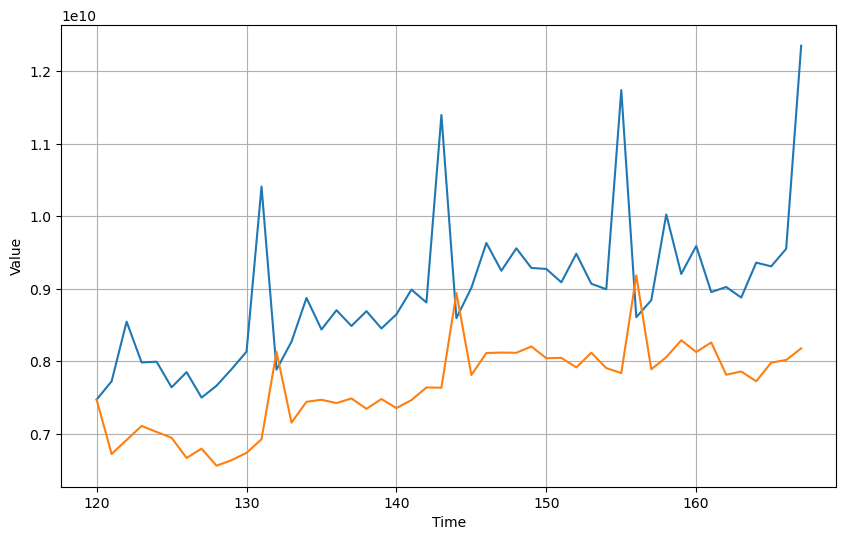

In [168]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)